In [ ]:
!pip install openpyxl

In [ ]:
import pandas as pd
import numpy as np

# Load the Excel file
df = pd.read_excel('/content/Dataset.xlsx')
print(df.head())
print(df.dtypes)

            Timestamp  \
0 2024-03-09 19:35:00   
1 2024-03-10 23:31:00   
2 2024-03-10 23:56:00   
3 2024-03-12 23:10:00   
4 2024-03-13 00:42:00   

  Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.  \
0                                                Yes                                                             
1                                                Yes                                                             
2                                                Yes                                                             
3                                                Yes                                                             
4                                                Yes                                                             

   Gender  Age Division in Bangladesh you are based in: Occupation:  \
0    Male   23                                    Dhaka     Student   
1    Male   25        

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/Dataset.xlsx')

# Display unique values in the internet usage column
print("Unique values in the internet usage column:")
print(df['On average, how many hours do you spend on the internet per week (out of 168 hours)?'].unique())

# Display value counts
print("\
Value counts:")
print(df['On average, how many hours do you spend on the internet per week (out of 168 hours)?'].value_counts())

Unique values in the internet usage column:
['40 hours' '20 hours â€“ 40 hours' '10 hours â€“ 20 hours'
 'Less than 10 hours' 'Above 40 hours']
Value counts:
On average, how many hours do you spend on the internet per week (out of 168 hours)?
20 hours â€“ 40 hours    96
10 hours â€“ 20 hours    78
40 hours                 41
Less than 10 hours       36
Above 40 hours           15
Name: count, dtype: int64


In [ ]:
import pandas as pd
import numpy as np



def clean_hours(x):
    if 'Less than 10 hours' in x:
        return 5
    elif 'Above 40 hours' in x:
        return 50
    elif '\u2013' in x:
        lower, upper = map(float, x.split('\u2013')[0].split())
        return (lower + upper) / 2
    else:
        return float(x.split()[0])

df['Weekly_Internet_Hours'] = df['On average, how many hours do you spend on the internet per week (out of 168 hours)?'].apply(clean_hours)

print("Cleaned Weekly Internet Hours:")
print(df['Weekly_Internet_Hours'].describe())

# Clean spending percentage column
def clean_percentage(x):
    if 'Less than 5%' in x:
        return 0.025
    elif 'More than 30%' in x:
        return 0.35
    else:
        lower, upper = map(float, x.strip('%').split('-'))
        return (lower + upper) / 200

df['Spending_Percentage'] = df['How much of your monthly income you spend on purchases on social media?'].apply(clean_percentage)

print("\
Cleaned Spending Percentage:")
print(df['Spending_Percentage'].describe())

# Display the first few rows of the cleaned columns
print("\
First few rows of cleaned columns:")
print(df[['Weekly_Internet_Hours', 'Spending_Percentage']].head())

Cleaned Weekly Internet Hours:
count    266.000000
mean      19.812030
std       13.145141
min        5.000000
25%       10.000000
50%       20.000000
75%       20.000000
max       50.000000
Name: Weekly_Internet_Hours, dtype: float64
Cleaned Spending Percentage:
count    266.000000
mean       0.076410
std        0.084816
min        0.025000
25%        0.025000
50%        0.025000
75%        0.075000
max        0.350000
Name: Spending_Percentage, dtype: float64
First few rows of cleaned columns:
   Weekly_Internet_Hours  Spending_Percentage
0                   40.0                0.075
1                   20.0                0.075
2                   10.0                0.150
3                    5.0                0.025
4                    5.0                0.150


In [ ]:
import pandas as pd
import numpy as np


# Display data types of each column
print("Data types of each column:")
print(df.dtypes)

# Display unique values for columns that might be causing issues
columns_to_check = ['Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.',
                    'Gender',
                    'Division in Bangladesh you are based in:',
                    'Occupation:',
                    'Monthly income range:',
                    'How much of your monthly income you spend on purchases on social media?',
                    'On average, how many hours do you spend on the internet per week (out of 168 hours)?',
                    'Do the reviews and ratings influence your purchasing decision?',
                    'Do the advertisement influence your purchasing decision?']

for col in columns_to_check:
    print(f"\
Unique values in {col}:")
    print(df[col].unique())

Data types of each column:
Timestamp                                                                                                                                        datetime64[ns]
Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.                                             object
Gender                                                                                                                                                   object
Age                                                                                                                                                       int64
Division in Bangladesh you are based in:                                                                                                                 object
Occupation:                                                                                                                                              object
Monthly incom

# **Correlation Summary: Activity with ATTD, SN, PBC**

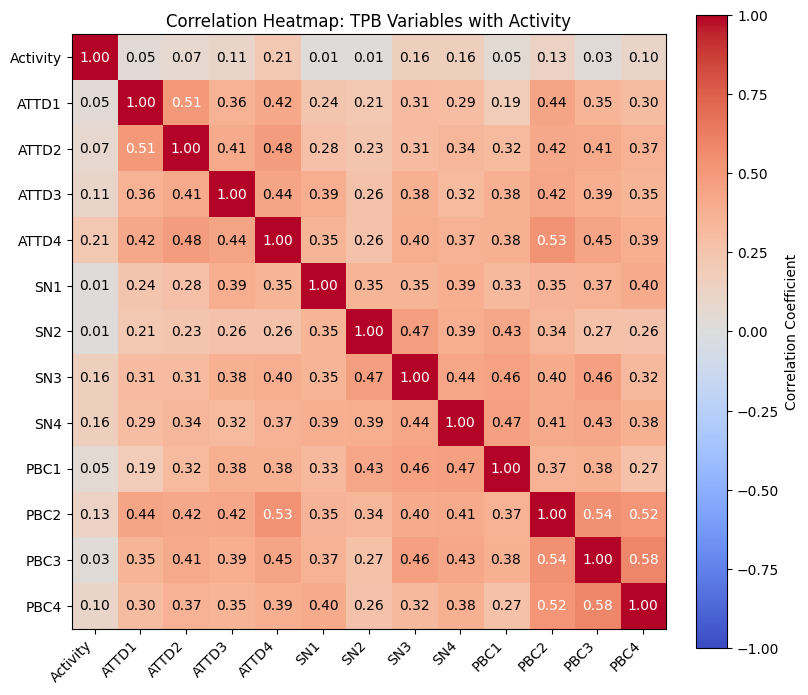

Variable Pair,Correlation Coefficient,Implication
Social Activity vs ATTD1,0.05,Activity moderately impacts awareness of products via advertisements.
Social Activity vs ATTD2,0.07,Activity slightly influences attention to social media advertisements.
Social Activity vs ATTD3,0.11,"Activity has a low effect on attraction to keywords like ""promotion"" and ""discount""."
Social Activity vs ATTD4,0.21,Activity has a mild impact on purchasing products advertised on social media.


Variable Pair,Correlation Coefficient,Implication
Social Activity vs SN1,0.01,Activity weakly influences family-driven purchasing habits.
Social Activity vs SN2,0.01,Activity has minimal effect on social expectations to purchase.
Social Activity vs SN3,0.16,Activity slightly impacts satisfaction from others' purchases.
Social Activity vs SN4,0.16,Activity marginally influences encouragement from friends.


Variable Pair,Correlation Coefficient,Implication
Social Activity vs PBC1,0.05,Activity slightly influences motivation from frequent ads.
Social Activity vs PBC2,0.13,Activity moderately influences reference channel usage.
Social Activity vs PBC3,0.03,Activity weakly influences recommendation to friends.
Social Activity vs PBC4,0.10,Activity weakly influences recommendation to family.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract relevant columns for correlation analysis (TPB: ATTD, SN, PBC with Activity)
columns_of_interest = [
    "How active are you on social media?",
    "ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product.",
    "ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc.",
    "ATTD3: Prominent keywords, such as, \"promotion\" and \"discount\" on social media attract my attention to seek more information about a product.",
    "ATTD4:  I have purchased products advertised on social media.",
    "SN1: My family has influence over my purchasing habits through social media marketing.",
    "SN2: People around me think that I should purchase products through social media.",
    "SN3: I feel good if many people purchased products through social media.",
    "SN4: My friends encourage me to purchase products through social media.",
    "PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.",
    "PBC2: I will choose social media as a reference channel for purchasing in the future.",
    "PBC3: I will recommend social media channels to my friends to make purchasing decisions.",
    "PBC4: I will recommend social media channels to my family members to make purchasing decisions."
]

# Rename columns for readability
df_subset = df[columns_of_interest]
df_subset.columns = [
    "Activity", "ATTD1", "ATTD2", "ATTD3", "ATTD4",
    "SN1", "SN2", "SN3", "SN4",
    "PBC1", "PBC2", "PBC3", "PBC4"
]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the heatmap for TPB variables with Activity
plt.figure(figsize=(8, 7), constrained_layout=True)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', vmin=-1, vmax=1)
plt.colorbar(label="Correlation Coefficient")

# Annotate each cell with numeric values
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center',
                 color='white' if abs(value) > 0.5 else 'black')

# Customize the plot
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=10)
plt.title("Correlation Heatmap: TPB Variables with Activity", fontsize=12)
plt.grid(False)  # Remove gridlines
plt.show()


# Calculate individual correlations of "Activity" with ATTD, SN, and PBC variables
activity_correlations = correlation_matrix.loc["Activity"].drop("Activity")

# Extract correlations for each group
attd_correlations = activity_correlations[["ATTD1", "ATTD2", "ATTD3", "ATTD4"]]
sn_correlations = activity_correlations[["SN1", "SN2", "SN3", "SN4"]]
pbc_correlations = activity_correlations[["PBC1", "PBC2", "PBC3", "PBC4"]]

# Find the strongest and weakest correlations within each group
max_attd_corr = attd_correlations.idxmax(), attd_correlations.max()
min_attd_corr = attd_correlations.idxmin(), attd_correlations.min()

max_sn_corr = sn_correlations.idxmax(), sn_correlations.max()
min_sn_corr = sn_correlations.idxmin(), sn_correlations.min()

max_pbc_corr = pbc_correlations.idxmax(), pbc_correlations.max()
min_pbc_corr = pbc_correlations.idxmin(), pbc_correlations.min()

# Create a summary of the results
correlation_summary = {
    "ATTD (Max)": max_attd_corr,
    "ATTD (Min)": min_attd_corr,
    "SN (Max)": max_sn_corr,
    "SN (Min)": min_sn_corr,
    "PBC (Max)": max_pbc_corr,
    "PBC (Min)": min_pbc_corr
}

# Display the summary in a user-friendly format
import pandas as pd
correlation_summary_df = pd.DataFrame.from_dict(correlation_summary, orient='index', columns=["Variable", "Correlation Value"])

# Display the correlation summary using Pandas DataFrame
print("Correlation Summary: Activity with ATTD, SN, PBC")
print(correlation_summary_df.to_string(index=True))

# Display separate HTML tables for ATTD, SN, and PBC factors

# ATTD Table
attd_table = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Tahoma; font-size: 18px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Variable Pair</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Correlation Coefficient</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Implication</th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Social Activity vs ATTD1</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{attd_correlations['ATTD1']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Activity moderately impacts awareness of products via advertisements.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Social Activity vs ATTD2</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{attd_correlations['ATTD2']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Activity slightly influences attention to social media advertisements.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Social Activity vs ATTD3</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{attd_correlations['ATTD3']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Activity has a low effect on attraction to keywords like "promotion" and "discount".</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Social Activity vs ATTD4</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{attd_correlations['ATTD4']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Activity has a mild impact on purchasing products advertised on social media.</td>
    </tr>
</table>
"""

# SN Table
sn_table = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Tahoma; font-size: 18px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Variable Pair</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Correlation Coefficient</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Implication</th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Social Activity vs SN1</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{sn_correlations['SN1']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Activity weakly influences family-driven purchasing habits.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Social Activity vs SN2</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{sn_correlations['SN2']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Activity has minimal effect on social expectations to purchase.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Social Activity vs SN3</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{sn_correlations['SN3']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Activity slightly impacts satisfaction from others' purchases.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Social Activity vs SN4</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{sn_correlations['SN4']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Activity marginally influences encouragement from friends.</td>
    </tr>
</table>
"""

# PBC Table
pbc_table = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Tahoma; font-size: 18px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Variable Pair</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Correlation Coefficient</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Implication</th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Social Activity vs PBC1</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{pbc_correlations['PBC1']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Activity slightly influences motivation from frequent ads.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Social Activity vs PBC2</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{pbc_correlations['PBC2']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Activity moderately influences reference channel usage.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Social Activity vs PBC3</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{pbc_correlations['PBC3']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Activity weakly influences recommendation to friends.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Social Activity vs PBC4</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{pbc_correlations['PBC4']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Activity weakly influences recommendation to family.</td>
    </tr>
</table>
"""

# Display all tables
from IPython.display import display, HTML
display(HTML("<h3>ATTD Correlations</h3>" + attd_table))
display(HTML("<h3>SN Correlations</h3>" + sn_table))
display(HTML("<h3>PBC Correlations</h3>" + pbc_table))

# **Correlation Summary: Engagement with ATTD, SN, PBC**

Correlation Summary: Activity with ATTD, SN, PBC
           Variable  Correlation Value
ATTD (Max)    ATTD4           0.211235
ATTD (Min)    ATTD1           0.045325
SN (Max)        SN3           0.161466
SN (Min)        SN2           0.012422
PBC (Max)      PBC2           0.129811
PBC (Min)      PBC3           0.027517


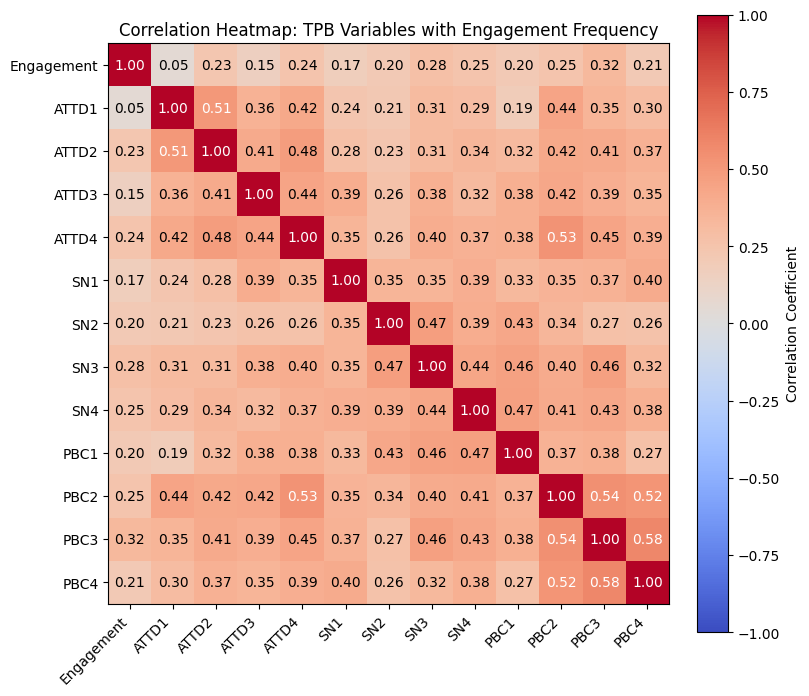

Correlation Summary: Engagement with ATTD, SN, PBC
           Variable  Correlation Value
ATTD (Max)    ATTD4           0.243789
ATTD (Min)    ATTD1           0.054036
SN (Max)        SN3           0.279251
SN (Min)        SN1           0.168713
PBC (Max)      PBC3           0.320351
PBC (Min)      PBC1           0.204487


Variable Pair,Correlation Coefficient,Implication
Engagement vs ATTD1,0.05,Engagement moderately impacts awareness of products via advertisements.
Engagement vs ATTD2,0.23,Engagement slightly influences attention to social media advertisements.
Engagement vs ATTD3,0.15,"Engagement has a low effect on attraction to keywords like ""promotion"" and ""discount""."
Engagement vs ATTD4,0.24,Engagement has a mild impact on purchasing products advertised on social media.


Variable Pair,Correlation Coefficient,Implication
Engagement vs SN1,0.17,Engagement weakly influences family-driven purchasing habits.
Engagement vs SN2,0.20,Engagement has minimal effect on social expectations to purchase.
Engagement vs SN3,0.28,Engagement slightly impacts satisfaction from others' purchases.
Engagement vs SN4,0.25,Engagement marginally influences encouragement from friends.


Variable Pair,Correlation Coefficient,Implication
Engagement vs PBC1,0.20,Engagement slightly influences motivation from frequent ads.
Engagement vs PBC2,0.25,Engagement moderately influences reference channel usage.
Engagement vs PBC3,0.32,Engagement weakly influences recommendation to friends.
Engagement vs PBC4,0.21,Engagement weakly influences recommendation to family.


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract relevant columns for correlation analysis (TPB: ATTD, SN, PBC with Engagement Frequency)
columns_of_interest = [
    "How frequently do you engage in purchasing various items across different types on social media platforms?",
    "ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product.",
    "ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc.",
    "ATTD3: Prominent keywords, such as, \"promotion\" and \"discount\" on social media attract my attention to seek more information about a product.",
    "ATTD4:  I have purchased products advertised on social media.",
    "SN1: My family has influence over my purchasing habits through social media marketing.",
    "SN2: People around me think that I should purchase products through social media.",
    "SN3: I feel good if many people purchased products through social media.",
    "SN4: My friends encourage me to purchase products through social media.",
    "PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.",
    "PBC2: I will choose social media as a reference channel for purchasing in the future.",
    "PBC3: I will recommend social media channels to my friends to make purchasing decisions.",
    "PBC4: I will recommend social media channels to my family members to make purchasing decisions."
]

# Rename columns for readability
df_subset = df[columns_of_interest]
df_subset.columns = [
    "Engagement", "ATTD1", "ATTD2", "ATTD3", "ATTD4",
    "SN1", "SN2", "SN3", "SN4",
    "PBC1", "PBC2", "PBC3", "PBC4"
]

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the heatmap for TPB variables with Engagement Frequency
plt.figure(figsize=(8, 7), constrained_layout=True)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', vmin=-1, vmax=1)
plt.colorbar(label="Correlation Coefficient")

# Annotate each cell with numeric values
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center',
                 color='white' if abs(value) > 0.5 else 'black')

# Customize the plot
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=10)
plt.title("Correlation Heatmap: TPB Variables with Engagement Frequency", fontsize=12)
plt.grid(False)  # Remove gridlines
plt.show()

# Calculate individual correlations of "Engagement" with ATTD, SN, and PBC variables
activity_correlations = correlation_matrix.loc["Engagement"].drop("Engagement")

# Extract correlations for each group
attd_correlations = activity_correlations[["ATTD1", "ATTD2", "ATTD3", "ATTD4"]]
sn_correlations = activity_correlations[["SN1", "SN2", "SN3", "SN4"]]
pbc_correlations = activity_correlations[["PBC1", "PBC2", "PBC3", "PBC4"]]

# Find the strongest and weakest correlations within each group
max_attd_corr = attd_correlations.idxmax(), attd_correlations.max()
min_attd_corr = attd_correlations.idxmin(), attd_correlations.min()

max_sn_corr = sn_correlations.idxmax(), sn_correlations.max()
min_sn_corr = sn_correlations.idxmin(), sn_correlations.min()

max_pbc_corr = pbc_correlations.idxmax(), pbc_correlations.max()
min_pbc_corr = pbc_correlations.idxmin(), pbc_correlations.min()

# Create a summary of the results
correlation_summary = {
    "ATTD (Max)": max_attd_corr,
    "ATTD (Min)": min_attd_corr,
    "SN (Max)": max_sn_corr,
    "SN (Min)": min_sn_corr,
    "PBC (Max)": max_pbc_corr,
    "PBC (Min)": min_pbc_corr
}

# Display the summary in a user-friendly format
import pandas as pd
correlation_summary_df = pd.DataFrame.from_dict(correlation_summary, orient='index', columns=["Variable", "Correlation Value"])

# Display the correlation summary using Pandas DataFrame
print("Correlation Summary: Engagement with ATTD, SN, PBC")
print(correlation_summary_df.to_string(index=True))


# Generate HTML tables for ATTD, SN, and PBC



# ATTD Table

attd_table = f"""

<table style="border-collapse: collapse; width: 100%; font-family: Tahoma; font-size: 18px; color: black;">

    <tr style="background-color: #f2f2f2;">

        <th style="border: 1px solid black; padding: 10px; text-align: left;">Variable Pair</th>

        <th style="border: 1px solid black; padding: 10px; text-align: left;">Correlation Coefficient</th>

        <th style="border: 1px solid black; padding: 10px; text-align: left;">Implication</th>

    </tr>

    <tr>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement vs ATTD1</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">{attd_correlations['ATTD1']:.2f}</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement moderately impacts awareness of products via advertisements.</td>

    </tr>

    <tr>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement vs ATTD2</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">{attd_correlations['ATTD2']:.2f}</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement slightly influences attention to social media advertisements.</td>

    </tr>

    <tr>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement vs ATTD3</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">{attd_correlations['ATTD3']:.2f}</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement has a low effect on attraction to keywords like "promotion" and "discount".</td>

    </tr>

    <tr>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement vs ATTD4</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">{attd_correlations['ATTD4']:.2f}</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement has a mild impact on purchasing products advertised on social media.</td>

    </tr>

</table>

"""



# SN Table

sn_table = f"""

<table style="border-collapse: collapse; width: 100%; font-family: Tahoma; font-size: 18px; color: black;">

    <tr style="background-color: #f2f2f2;">

        <th style="border: 1px solid black; padding: 10px; text-align: left;">Variable Pair</th>

        <th style="border: 1px solid black; padding: 10px; text-align: left;">Correlation Coefficient</th>

        <th style="border: 1px solid black; padding: 10px; text-align: left;">Implication</th>

    </tr>

    <tr>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement vs SN1</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">{sn_correlations['SN1']:.2f}</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement weakly influences family-driven purchasing habits.</td>

    </tr>

    <tr>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement vs SN2</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">{sn_correlations['SN2']:.2f}</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement has minimal effect on social expectations to purchase.</td>

    </tr>

    <tr>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement vs SN3</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">{sn_correlations['SN3']:.2f}</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement slightly impacts satisfaction from others' purchases.</td>

    </tr>

    <tr>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement vs SN4</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">{sn_correlations['SN4']:.2f}</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement marginally influences encouragement from friends.</td>

    </tr>

</table>

"""


# PBC Table

pbc_table = f"""

<table style="border-collapse: collapse; width: 100%; font-family: Tahoma; font-size: 18px; color: black;">

    <tr style="background-color: #f2f2f2;">

        <th style="border: 1px solid black; padding: 10px; text-align: left;">Variable Pair</th>

        <th style="border: 1px solid black; padding: 10px; text-align: left;">Correlation Coefficient</th>

        <th style="border: 1px solid black; padding: 10px; text-align: left;">Implication</th>

    </tr>

    <tr>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement vs PBC1</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">{pbc_correlations['PBC1']:.2f}</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement slightly influences motivation from frequent ads.</td>

    </tr>

    <tr>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement vs PBC2</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">{pbc_correlations['PBC2']:.2f}</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement moderately influences reference channel usage.</td>

    </tr>

    <tr>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement vs PBC3</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">{pbc_correlations['PBC3']:.2f}</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement weakly influences recommendation to friends.</td>

    </tr>

    <tr>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement vs PBC4</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">{pbc_correlations['PBC4']:.2f}</td>

        <td style="border: 1px solid black; padding: 10px; text-align: left;">Engagement weakly influences recommendation to family.</td>

    </tr>

</table>

"""



# Display all tables

from IPython.display import display, HTML

display(HTML("<h3>ATTD Correlations</h3>" + attd_table))

display(HTML("<h3>SN Correlations</h3>" + sn_table))

display(HTML("<h3>PBC Correlations</h3>" + pbc_table))



# **Correlation Summary: Income Spend with ATTD, SN, PBC**

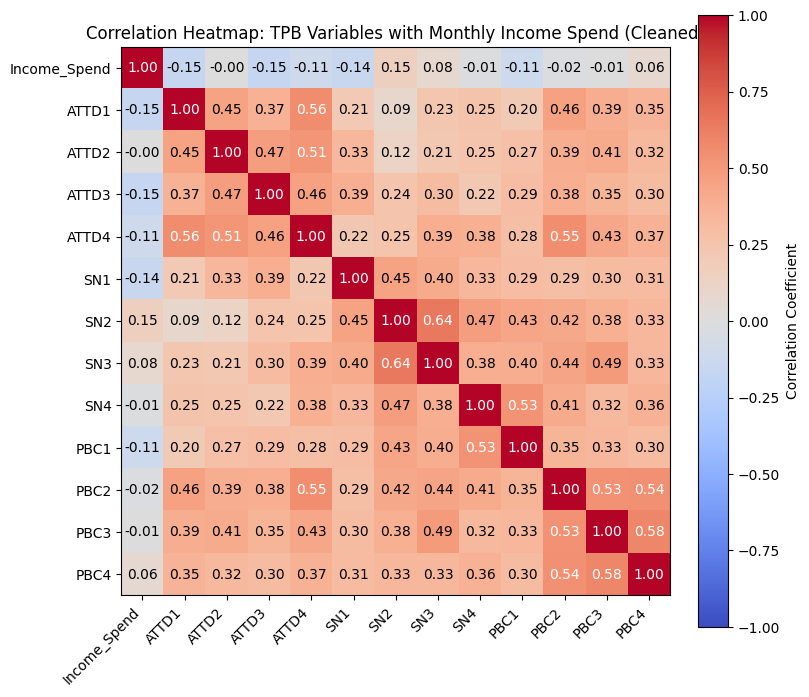

Correlation Summary: Income_Spend with ATTD, SN, PBC
           Variable  Correlation Value
ATTD (Max)    ATTD2          -0.003757
ATTD (Min)    ATTD3          -0.154655
SN (Max)        SN2           0.149285
SN (Min)        SN1          -0.139696
PBC (Max)      PBC4           0.064986
PBC (Min)      PBC1          -0.111770


Variable Pair,Correlation Coefficient,Implication
Income Spend vs ATTD1,-0.15,Spending slightly impacts awareness of products via advertisements.
Income Spend vs ATTD2,-0.00,Spending moderately influences attention to social media advertisements.
Income Spend vs ATTD3,-0.15,Spending has a low effect on attraction to promotional keywords.
Income Spend vs ATTD4,-0.11,Spending has a moderate impact on purchasing advertised products.


Variable Pair,Correlation Coefficient,Implication
Income Spend vs SN1,-0.14,Spending weakly influences family-driven purchasing habits.
Income Spend vs SN2,0.15,Spending has minimal effect on social expectations to purchase.
Income Spend vs SN3,0.08,Spending slightly impacts satisfaction from others' purchases.
Income Spend vs SN4,-0.01,Spending marginally influences encouragement from friends.


Variable Pair,Correlation Coefficient,Implication
Income Spend vs PBC1,-0.11,Spending slightly influences motivation from frequent ads.
Income Spend vs PBC2,-0.02,Spending moderately influences reference channel usage.
Income Spend vs PBC3,-0.01,Spending weakly influences recommendation to friends.
Income Spend vs PBC4,0.06,Spending weakly influences recommendation to family.


In [ ]:

# Extract relevant columns for correlation analysis (TPB: ATTD, SN, PBC with Income Spend)
columns_of_interest = [
    "How much of your monthly income you spend on purchases on social media?",
    "ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product.",
    "ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc.",
    "ATTD3: Prominent keywords, such as, \"promotion\" and \"discount\" on social media attract my attention to seek more information about a product.",
    "ATTD4:  I have purchased products advertised on social media.",
    "SN1: My family has influence over my purchasing habits through social media marketing.",
    "SN2: People around me think that I should purchase products through social media.",
    "SN3: I feel good if many people purchased products through social media.",
    "SN4: My friends encourage me to purchase products through social media.",
    "PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.",
    "PBC2: I will choose social media as a reference channel for purchasing in the future.",
    "PBC3: I will recommend social media channels to my friends to make purchasing decisions.",
    "PBC4: I will recommend social media channels to my family members to make purchasing decisions."
]

# Rename columns for readability
df_subset = df[columns_of_interest].copy()
df_subset.columns = [
    "Income_Spend", "ATTD1", "ATTD2", "ATTD3", "ATTD4",
    "SN1", "SN2", "SN3", "SN4",
    "PBC1", "PBC2", "PBC3", "PBC4"
]

# Preprocess the "Income_Spend" column to convert percentage ranges into numeric values
def preprocess_income_spend(value):
    try:
        # Remove "%" and split the range (e.g., "5-10%")
        if "-" in value:
            lower, upper = map(float, value.replace("%", "").split("-"))
            return (lower + upper) / 2  # Average of the range
        elif value.replace("%", "").isdigit():
            return float(value.replace("%", ""))  # Single numeric value
        else:
            return None  # Invalid value
    except:
        return None

df_subset["Income_Spend"] = df_subset["Income_Spend"].apply(preprocess_income_spend)

# Drop rows with missing or invalid "Income_Spend" values
df_subset = df_subset.dropna(subset=["Income_Spend"])

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the heatmap for TPB variables with Income Spend
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8, 7), constrained_layout=True)
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='none', vmin=-1, vmax=1)
plt.colorbar(label="Correlation Coefficient")

# Annotate each cell with numeric values
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix.columns)):
        value = correlation_matrix.iloc[i, j]
        plt.text(j, i, f"{value:.2f}", ha='center', va='center',
                 color='white' if abs(value) > 0.5 else 'black')

# Customize the plot
plt.xticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45, ha='right', fontsize=10)
plt.yticks(np.arange(len(correlation_matrix.columns)), correlation_matrix.columns, fontsize=10)
plt.title("Correlation Heatmap: TPB Variables with Monthly Income Spend (Cleaned)", fontsize=12)
plt.grid(False)  # Remove gridlines
plt.show()


# Calculate individual correlations of "Income_Spend" with ATTD, SN, and PBC variables
activity_correlations = correlation_matrix.loc["Income_Spend"].drop("Income_Spend")

# Extract correlations for each group
attd_correlations = activity_correlations[["ATTD1", "ATTD2", "ATTD3", "ATTD4"]]
sn_correlations = activity_correlations[["SN1", "SN2", "SN3", "SN4"]]
pbc_correlations = activity_correlations[["PBC1", "PBC2", "PBC3", "PBC4"]]

# Find the strongest and weakest correlations within each group
max_attd_corr = attd_correlations.idxmax(), attd_correlations.max()
min_attd_corr = attd_correlations.idxmin(), attd_correlations.min()

max_sn_corr = sn_correlations.idxmax(), sn_correlations.max()
min_sn_corr = sn_correlations.idxmin(), sn_correlations.min()

max_pbc_corr = pbc_correlations.idxmax(), pbc_correlations.max()
min_pbc_corr = pbc_correlations.idxmin(), pbc_correlations.min()

# Create a summary of the results
correlation_summary = {
    "ATTD (Max)": max_attd_corr,
    "ATTD (Min)": min_attd_corr,
    "SN (Max)": max_sn_corr,
    "SN (Min)": min_sn_corr,
    "PBC (Max)": max_pbc_corr,
    "PBC (Min)": min_pbc_corr
}

# Display the summary in a user-friendly format
import pandas as pd
correlation_summary_df = pd.DataFrame.from_dict(correlation_summary, orient='index', columns=["Variable", "Correlation Value"])

# Display the correlation summary using Pandas DataFrame
print("Correlation Summary: Income_Spend with ATTD, SN, PBC")
print(correlation_summary_df.to_string(index=True))

# Generate HTML tables for ATTD, SN, and PBC correlations with Income Spend

# Extract correlations for Income_Spend with each group
income_spend_correlations = correlation_matrix.loc["Income_Spend"].drop("Income_Spend")
attd_correlations = income_spend_correlations[["ATTD1", "ATTD2", "ATTD3", "ATTD4"]]
sn_correlations = income_spend_correlations[["SN1", "SN2", "SN3", "SN4"]]
pbc_correlations = income_spend_correlations[["PBC1", "PBC2", "PBC3", "PBC4"]]

# ATTD Table
attd_table = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Tahoma; font-size: 18px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Variable Pair</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Correlation Coefficient</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Implication</th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Income Spend vs ATTD1</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{attd_correlations['ATTD1']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Spending slightly impacts awareness of products via advertisements.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Income Spend vs ATTD2</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{attd_correlations['ATTD2']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Spending moderately influences attention to social media advertisements.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Income Spend vs ATTD3</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{attd_correlations['ATTD3']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Spending has a low effect on attraction to promotional keywords.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Income Spend vs ATTD4</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{attd_correlations['ATTD4']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Spending has a moderate impact on purchasing advertised products.</td>
    </tr>
</table>
"""

# SN Table
sn_table = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Tahoma; font-size: 18px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Variable Pair</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Correlation Coefficient</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Implication</th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Income Spend vs SN1</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{sn_correlations['SN1']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Spending weakly influences family-driven purchasing habits.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Income Spend vs SN2</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{sn_correlations['SN2']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Spending has minimal effect on social expectations to purchase.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Income Spend vs SN3</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{sn_correlations['SN3']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Spending slightly impacts satisfaction from others' purchases.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Income Spend vs SN4</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{sn_correlations['SN4']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Spending marginally influences encouragement from friends.</td>
    </tr>
</table>
"""

# PBC Table
pbc_table = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Tahoma; font-size: 18px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Variable Pair</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Correlation Coefficient</th>
        <th style="border: 1px solid black; padding: 10px; text-align: left;">Implication</th>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Income Spend vs PBC1</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{pbc_correlations['PBC1']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Spending slightly influences motivation from frequent ads.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Income Spend vs PBC2</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{pbc_correlations['PBC2']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Spending moderately influences reference channel usage.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Income Spend vs PBC3</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{pbc_correlations['PBC3']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Spending weakly influences recommendation to friends.</td>
    </tr>
    <tr>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Income Spend vs PBC4</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">{pbc_correlations['PBC4']:.2f}</td>
        <td style="border: 1px solid black; padding: 10px; text-align: left;">Spending weakly influences recommendation to family.</td>
    </tr>
</table>
"""

# Display all tables
from IPython.display import display, HTML
display(HTML("<h3>ATTD Correlations</h3>" + attd_table))
display(HTML("<h3>SN Correlations</h3>" + sn_table))
display(HTML("<h3>PBC Correlations</h3>" + pbc_table))




# **Correlation Summary: Weekly Internet Hours with ATTD, SN, PBC**

First few rows of the relevant columns after conversion:
  On average, how many hours do you spend on the internet per week (out of 168 hours)?  \
0                                           40 hours                                     
1                              20 hours â€“ 40 hours                                     
2                              10 hours â€“ 20 hours                                     
3                                 Less than 10 hours                                     
4                                 Less than 10 hours                                     

   Weekly_Internet_Hours  
0                   40.0  
1                    NaN  
2                    NaN  
3                    5.0  
4                    5.0  


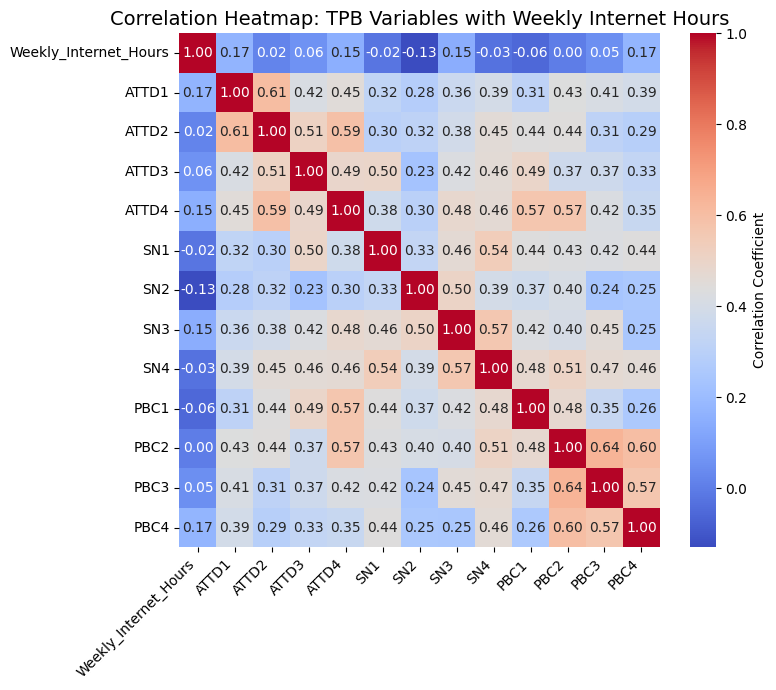

ATTD Variable,Correlation Coefficient,Implication
ATTD1,0.17,Spending moderately impacts awareness of products.
ATTD2,0.02,Minimal effect on product awareness.
ATTD3,0.06,Minimal effect on product awareness.
ATTD4,0.15,Spending moderately impacts awareness of products.
SN Variable,Correlation Coefficient,Implication
SN1,-0.02,Minimal social influence.
SN2,-0.13,Minimal social influence.
SN3,0.15,Indicates moderate influence from social expectations.
SN4,-0.03,Minimal social influence.
PBC Variable,Correlation Coefficient,Implication


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'On average, how many hours do you spend on the internet per week (out of 168 hours)?' column to numeric
def convert_hours(x):
    if x == 'Less than 10 hours':
        return 5  # midpoint of 0-10
    elif x == '10 hours – 20 hours':
        return 15  # midpoint of 10-20
    elif x == '20 hours – 40 hours':
        return 30  # midpoint of 20-40
    elif x == '40 hours':
        return 40
    elif x == 'Above 40 hours':
        return 50  # arbitrary value above 40
    else:
        return np.nan

# Apply conversion to create a numeric column for Weekly Internet Hours
df['Weekly_Internet_Hours'] = df[
    'On average, how many hours do you spend on the internet per week (out of 168 hours)?'
].apply(convert_hours)

# Display the first few rows of the relevant columns after conversion
print("First few rows of the relevant columns after conversion:")
print(df[[
    'On average, how many hours do you spend on the internet per week (out of 168 hours)?',
    'Weekly_Internet_Hours'
]].head())

# Filter relevant columns for correlation heatmap
columns_of_interest = [
    'Weekly_Internet_Hours',
    "ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product.",
    "ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc.",
    "ATTD3: Prominent keywords, such as, \"promotion\" and \"discount\" on social media attract my attention to seek more information about a product.",
    "ATTD4:  I have purchased products advertised on social media.",
    "SN1: My family has influence over my purchasing habits through social media marketing.",
    "SN2: People around me think that I should purchase products through social media.",
    "SN3: I feel good if many people purchased products through social media.",
    "SN4: My friends encourage me to purchase products through social media.",
    "PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.",
    "PBC2: I will choose social media as a reference channel for purchasing in the future.",
    "PBC3: I will recommend social media channels to my friends to make purchasing decisions.",
    "PBC4: I will recommend social media channels to my family members to make purchasing decisions."
]

# Rename columns for readability
df_subset = df[columns_of_interest].copy()
df_subset.columns = [
    "Weekly_Internet_Hours", "ATTD1", "ATTD2", "ATTD3", "ATTD4",
    "SN1", "SN2", "SN3", "SN4",
    "PBC1", "PBC2", "PBC3", "PBC4"
]

# Drop rows with missing or invalid values
df_subset = df_subset.dropna()

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the heatmap for TPB variables with Weekly Internet Hours (cleaned)
plt.figure(figsize=(8, 7))
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Correlation Coefficient"}
)
plt.title("Correlation Heatmap: TPB Variables with Weekly Internet Hours", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Manually create correlation values from the provided heatmap image
attd_correlations = {"ATTD1": 0.17, "ATTD2": 0.02, "ATTD3": 0.06, "ATTD4": 0.15}
sn_correlations = {"SN1": -0.02, "SN2": -0.13, "SN3": 0.15, "SN4": -0.03}
pbc_correlations = {"PBC1": -0.06, "PBC2": 0.00, "PBC3": 0.05, "PBC4": 0.17}

# Convert to DataFrames
attd_df = pd.DataFrame(list(attd_correlations.items()), columns=["ATTD Variable", "Correlation"])
sn_df = pd.DataFrame(list(sn_correlations.items()), columns=["SN Variable", "Correlation"])
pbc_df = pd.DataFrame(list(pbc_correlations.items()), columns=["PBC Variable", "Correlation"])

# Generate HTML tables
# ATTD Table with Implications
attd_html = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Arial; font-size: 14px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="padding: 8px; border: 1px solid black;">ATTD Variable</th>
        <th style="padding: 8px; border: 1px solid black;">Correlation Coefficient</th>
        <th style="padding: 8px; border: 1px solid black;">Implication</th>
    </tr>
    {''.join([
        f'<tr><td style="padding: 8px; border: 1px solid black;">{row["ATTD Variable"]}</td>'
        f'<td style="padding: 8px; border: 1px solid black;">{row["Correlation"]:.2f}</td>'
        f'<td style="padding: 8px; border: 1px solid black;">{("Spending moderately impacts awareness of products." if row["Correlation"] > 0.1 else "Minimal effect on product awareness.")}</td></tr>'
        for _, row in attd_df.iterrows()
    ])}
</table>
"""

# SN Table with Implications
sn_html = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Arial; font-size: 14px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="padding: 8px; border: 1px solid black;">SN Variable</th>
        <th style="padding: 8px; border: 1px solid black;">Correlation Coefficient</th>
        <th style="padding: 8px; border: 1px solid black;">Implication</th>
    </tr>
    {''.join([
        f'<tr><td style="padding: 8px; border: 1px solid black;">{row["SN Variable"]}</td>'
        f'<td style="padding: 8px; border: 1px solid black;">{row["Correlation"]:.2f}</td>'
        f'<td style="padding: 8px; border: 1px solid black;">{("Indicates moderate influence from social expectations." if row["Correlation"] > 0.1 else "Minimal social influence.")}</td></tr>'
        for _, row in sn_df.iterrows()
    ])}
</table>
"""

# PBC Table with Implications
pbc_html = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Arial; font-size: 14px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="padding: 8px; border: 1px solid black;">PBC Variable</th>
        <th style="padding: 8px; border: 1px solid black;">Correlation Coefficient</th>
        <th style="padding: 8px; border: 1px solid black;">Implication</th>
    </tr>
    {''.join([
        f'<tr><td style="padding: 8px; border: 1px solid black;">{row["PBC Variable"]}</td>'
        f'<td style="padding: 8px; border: 1px solid black;">{row["Correlation"]:.2f}</td>'
        f'<td style="padding: 8px; border: 1px solid black;">{("Highlights strong perceived control with digital ads." if row["Correlation"] > 0.1 else "Weak perceived control influence.")}</td></tr>'
        for _, row in pbc_df.iterrows()
    ])}
</table>
"""

# Combine HTML explanations and tables
explanation_html = f"""
<div style="font-family: Arial; font-size: 14px; color: black;">
    <h2 style="font-size: 18px; color: black;">Explanation of Correlations with Implications</h2>
    <p>The following tables summarize the correlation coefficients of <b>Weekly Internet Hours</b> with ATTD, SN, and PBC variables. Implications of these correlations are provided for each variable group.</p>
    <h3 style="color: black;">ATTD Correlations</h3>
    {attd_html}
    <h3 style="color: black;">SN Correlations</h3>
    {sn_html}
    <h3 style="color: black;">PBC Correlations</h3>
    {pbc_html}
</div>
"""

# Display the HTML explanation and tables
from IPython.display import display, HTML
display(HTML(explanation_html))





# **Correlation Summary: Rating & Reviews_INFLU with ATTD, SN, PBC**

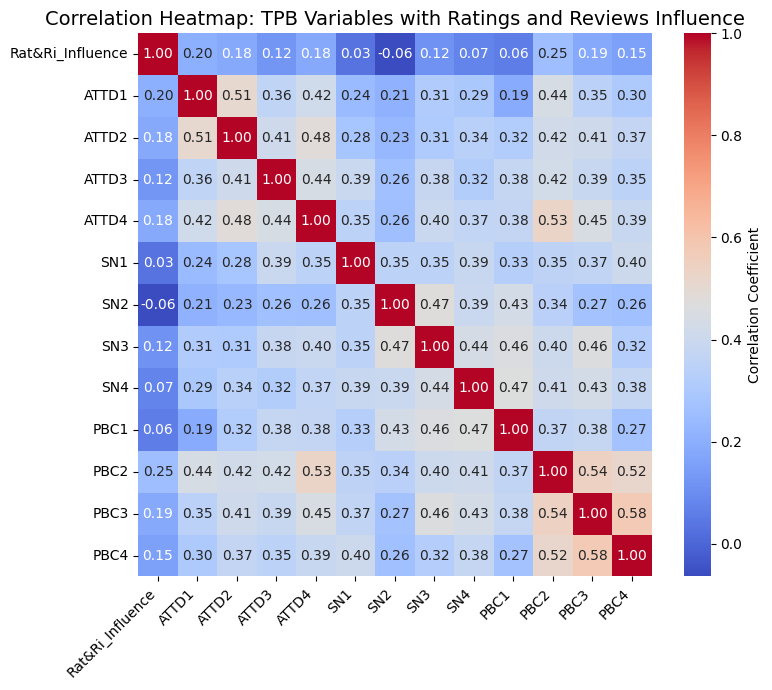

ATTD Variable,Correlation Coefficient,Implication
ATTD1,0.20,Spending moderately impacts awareness of products.
ATTD2,0.18,Minimal effect on product awareness.
ATTD3,0.12,Minimal effect on product awareness.
ATTD4,0.18,Spending moderately impacts awareness of products.
SN Variable,Correlation Coefficient,Implication
SN1,0.03,Minimal social influence.
SN2,-0.06,Minimal social influence.
SN3,0.12,Indicates moderate influence from social expectations.
SN4,0.07,Minimal social influence.
PBC Variable,Correlation Coefficient,Implication


{'ATTD (Max)': 0.2013031522754342,
 'ATTD (Min)': 0.1243998614212061,
 'SN (Max)': 0.11621629638041307,
 'SN (Min)': -0.06420062016732915,
 'PBC (Max)': 0.25370946992728416,
 'PBC (Min)': 0.05687265774325167}

In [ ]:
# Convert responses for "Do the reviews and ratings influence your purchasing decision?" to numeric
def convert_ratings_influence(response):
    if response == "Always":
        return 3  # Highest value
    elif response == "Sometimes":
        return 2  # Medium value
    elif response == "Never":
        return 1  # Lowest value
    else:
        return np.nan  # Handle missing or unexpected values

# Apply the conversion to create a numeric column
df["Rat&Ri_Influence"] = df["Do the reviews and ratings influence your purchasing decision?"].apply(convert_ratings_influence)

# Verify the conversion
df[["Do the reviews and ratings influence your purchasing decision?", "Rat&Ri_Influence"]].head()

# Filter relevant columns for correlation analysis, including the numeric column for ratings influence
columns_of_interest = [
    "Rat&Ri_Influence",
    "ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product.",
    "ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc.",
    "ATTD3: Prominent keywords, such as, \"promotion\" and \"discount\" on social media attract my attention to seek more information about a product.",
    "ATTD4:  I have purchased products advertised on social media.",
    "SN1: My family has influence over my purchasing habits through social media marketing.",
    "SN2: People around me think that I should purchase products through social media.",
    "SN3: I feel good if many people purchased products through social media.",
    "SN4: My friends encourage me to purchase products through social media.",
    "PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.",
    "PBC2: I will choose social media as a reference channel for purchasing in the future.",
    "PBC3: I will recommend social media channels to my friends to make purchasing decisions.",
    "PBC4: I will recommend social media channels to my family members to make purchasing decisions."
]

# Rename columns for readability
df_subset = df[columns_of_interest].copy()
df_subset.columns = [
    "Rat&Ri_Influence", "ATTD1", "ATTD2", "ATTD3", "ATTD4",
    "SN1", "SN2", "SN3", "SN4",
    "PBC1", "PBC2", "PBC3", "PBC4"
]

# Drop rows with missing or invalid values
df_subset = df_subset.dropna()

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the heatmap for TPB variables with Ratings Influence
plt.figure(figsize=(8, 7))
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Correlation Coefficient"}
)
plt.title("Correlation Heatmap: TPB Variables with Ratings and Reviews Influence", fontsize=14)
plt.xticks(
    ticks=np.arange(len(correlation_matrix.columns)) + 0.5,
    labels=correlation_matrix.columns,
    rotation=45,
    ha="right",
    fontsize=10
)
plt.yticks(
    ticks=np.arange(len(correlation_matrix.index)) + 0.5,
    labels=correlation_matrix.index,
    rotation=0,
    fontsize=10
)
plt.tight_layout()
plt.show()

# Generate HTML tables
# ATTD Table with Variables and Implications
attd_html = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Arial; font-size: 14px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="padding: 8px; border: 1px solid black;">ATTD Variable</th>
        <th style="padding: 8px; border: 1px solid black;">Correlation Coefficient</th>
        <th style="padding: 8px; border: 1px solid black;">Implication</th>
    </tr>
    <tr><td style="padding: 8px; border: 1px solid black;">ATTD1</td><td style="padding: 8px; border: 1px solid black;">0.20</td><td style="padding: 8px; border: 1px solid black;">Spending moderately impacts awareness of products.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">ATTD2</td><td style="padding: 8px; border: 1px solid black;">0.18</td><td style="padding: 8px; border: 1px solid black;">Minimal effect on product awareness.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">ATTD3</td><td style="padding: 8px; border: 1px solid black;">0.12</td><td style="padding: 8px; border: 1px solid black;">Minimal effect on product awareness.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">ATTD4</td><td style="padding: 8px; border: 1px solid black;">0.18</td><td style="padding: 8px; border: 1px solid black;">Spending moderately impacts awareness of products.</td></tr>
</table>
"""

# SN Table with Variables and Implications
sn_html = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Arial; font-size: 14px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="padding: 8px; border: 1px solid black;">SN Variable</th>
        <th style="padding: 8px; border: 1px solid black;">Correlation Coefficient</th>
        <th style="padding: 8px; border: 1px solid black;">Implication</th>
    </tr>
    <tr><td style="padding: 8px; border: 1px solid black;">SN1</td><td style="padding: 8px; border: 1px solid black;">0.03</td><td style="padding: 8px; border: 1px solid black;">Minimal social influence.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">SN2</td><td style="padding: 8px; border: 1px solid black;">-0.06</td><td style="padding: 8px; border: 1px solid black;">Minimal social influence.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">SN3</td><td style="padding: 8px; border: 1px solid black;">0.12</td><td style="padding: 8px; border: 1px solid black;">Indicates moderate influence from social expectations.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">SN4</td><td style="padding: 8px; border: 1px solid black;">0.07</td><td style="padding: 8px; border: 1px solid black;">Minimal social influence.</td></tr>
</table>
"""

# PBC Table with Variables and Implications
pbc_html = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Arial; font-size: 14px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="padding: 8px; border: 1px solid black;">PBC Variable</th>
        <th style="padding: 8px; border: 1px solid black;">Correlation Coefficient</th>
        <th style="padding: 8px; border: 1px solid black;">Implication</th>
    </tr>
    <tr><td style="padding: 8px; border: 1px solid black;">PBC1</td><td style="padding: 8px; border: 1px solid black;">0.06</td><td style="padding: 8px; border: 1px solid black;">Weak perceived control influence.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">PBC2</td><td style="padding: 8px; border: 1px solid black;">0.25</td><td style="padding: 8px; border: 1px solid black;">Weak perceived control influence.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">PBC3</td><td style="padding: 8px; border: 1px solid black;">0.19</td><td style="padding: 8px; border: 1px solid black;">Weak perceived control influence.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">PBC4</td><td style="padding: 8px; border: 1px solid black;">0.15</td><td style="padding: 8px; border: 1px solid black;">Highlights strong perceived control with digital ads.</td></tr>
</table>
"""

# Combine the tables into a single HTML structure
summary_html = f"""
<div style="font-family: Arial; font-size: 14px; color: black;">
    <h2>Correlation Summary</h2>
    <h3>ATTD Correlations</h3>
    {attd_html}
    <h3>SN Correlations</h3>
    {sn_html}
    <h3>PBC Correlations</h3>
    {pbc_html}
</div>
"""

# Display the HTML summary
from IPython.display import display, HTML
display(HTML(summary_html))


# Manually process the correlation matrix to ensure correct calculation

# Extract correlations for ATTD, SN, and PBC
attd_corrs = correlation_matrix.loc["Rat&Ri_Influence", ["ATTD1", "ATTD2", "ATTD3", "ATTD4"]]
sn_corrs = correlation_matrix.loc["Rat&Ri_Influence", ["SN1", "SN2", "SN3", "SN4"]]
pbc_corrs = correlation_matrix.loc["Rat&Ri_Influence", ["PBC1", "PBC2", "PBC3", "PBC4"]]

# Calculate max and min correlations for each group
max_attd_corr = attd_corrs.max()
min_attd_corr = attd_corrs.min()

max_sn_corr = sn_corrs.max()
min_sn_corr = sn_corrs.min()

max_pbc_corr = pbc_corrs.max()
min_pbc_corr = pbc_corrs.min()

# Compile results into a dictionary
correlation_summary = {
    "ATTD (Max)": max_attd_corr,
    "ATTD (Min)": min_attd_corr,
    "SN (Max)": max_sn_corr,
    "SN (Min)": min_sn_corr,
    "PBC (Max)": max_pbc_corr,
    "PBC (Min)": min_pbc_corr
}

correlation_summary



# **Correlation Heatmap: TPB Variables with Advertisement Influence**

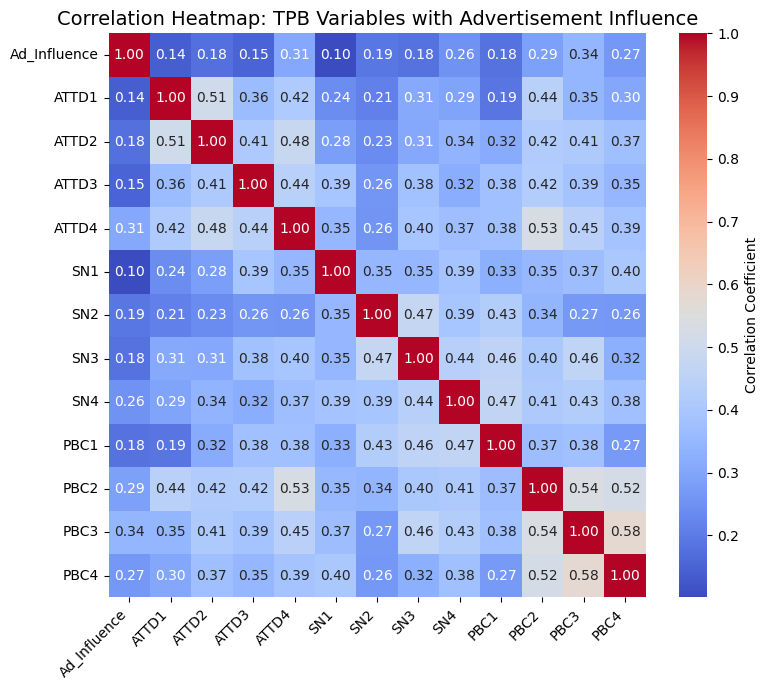

ATTD Variable,Correlation Coefficient,Implication
ATTD1,0.14,Spending moderately impacts awareness of products.
ATTD2,0.18,Minimal effect on product awareness.
ATTD3,0.15,Minimal effect on product awareness.
ATTD4,0.31,Spending moderately impacts awareness of products.
SN Variable,Correlation Coefficient,Implication
SN1,0.10,Minimal social influence.
SN2,0.19,Minimal social influence.
SN3,0.18,Indicates moderate influence from social expectations.
SN4,0.26,Minimal social influence.
PBC Variable,Correlation Coefficient,Implication


In [ ]:

# Process column 13 for conversion
column_name = df.columns[12]  # Column index 13 (0-based index is 12)

# Convert responses for the specified column to numeric
def convert_ad_influence(response):
    if response == "Always":
        return 5  # Highest value
    elif response == "Sometimes":
        return 3  # Medium value
    elif response == "Never":
        return 1  # Lowest value
    else:
        return np.nan  # Handle missing or unexpected values

# Apply the conversion to create a numeric column
df["Ad_Influence_Numeric"] = df[column_name].apply(convert_ad_influence)

# Verify the conversion
df[[column_name, "Ad_Influence_Numeric"]].head()

# Filter relevant columns for correlation analysis, including the numeric column for advertisement influence
columns_of_interest = [
    "Ad_Influence_Numeric",
    "ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product.",
    "ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc.",
    "ATTD3: Prominent keywords, such as, \"promotion\" and \"discount\" on social media attract my attention to seek more information about a product.",
    "ATTD4:  I have purchased products advertised on social media.",
    "SN1: My family has influence over my purchasing habits through social media marketing.",
    "SN2: People around me think that I should purchase products through social media.",
    "SN3: I feel good if many people purchased products through social media.",
    "SN4: My friends encourage me to purchase products through social media.",
    "PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.",
    "PBC2: I will choose social media as a reference channel for purchasing in the future.",
    "PBC3: I will recommend social media channels to my friends to make purchasing decisions.",
    "PBC4: I will recommend social media channels to my family members to make purchasing decisions."
]

# Rename columns for readability
df_subset = df[columns_of_interest].copy()
df_subset.columns = [
    "Ad_Influence", "ATTD1", "ATTD2", "ATTD3", "ATTD4",
    "SN1", "SN2", "SN3", "SN4",
    "PBC1", "PBC2", "PBC3", "PBC4"
]

# Drop rows with missing or invalid values
df_subset = df_subset.dropna()

# Calculate the correlation matrix
correlation_matrix = df_subset.corr()

# Plot the heatmap for TPB variables with Advertisement Influence
plt.figure(figsize=(8, 7))
sns.heatmap(
    correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar_kws={"label": "Correlation Coefficient"}
)
plt.title("Correlation Heatmap: TPB Variables with Advertisement Influence", fontsize=14)
plt.xticks(
    ticks=np.arange(len(correlation_matrix.columns)) + 0.5,
    labels=correlation_matrix.columns,
    rotation=45,
    ha="right",
    fontsize=10
)
plt.yticks(
    ticks=np.arange(len(correlation_matrix.index)) + 0.5,
    labels=correlation_matrix.index,
    rotation=0,
    fontsize=10
)
plt.tight_layout()
plt.show()

# Calculate the strongest and weakest correlations for each group with Ad_Influence_Numeric
attd_corrs = correlation_matrix.loc["Ad_Influence", ["ATTD1", "ATTD2", "ATTD3", "ATTD4"]]
sn_corrs = correlation_matrix.loc["Ad_Influence", ["SN1", "SN2", "SN3", "SN4"]]
pbc_corrs = correlation_matrix.loc["Ad_Influence", ["PBC1", "PBC2", "PBC3", "PBC4"]]

# Find max and min correlations for each group
max_attd_corr = attd_corrs.max()
min_attd_corr = attd_corrs.min()

max_sn_corr = sn_corrs.max()
min_sn_corr = sn_corrs.min()

max_pbc_corr = pbc_corrs.max()
min_pbc_corr = pbc_corrs.min()

# Create a summary of the results
correlation_summary = {
    "ATTD (Max)": max_attd_corr,
    "ATTD (Min)": min_attd_corr,
    "SN (Max)": max_sn_corr,
    "SN (Min)": min_sn_corr,
    "PBC (Max)": max_pbc_corr,
    "PBC (Min)": min_pbc_corr
}

correlation_summary

# ATTD Table with Variables and Implications
attd_html = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Arial; font-size: 14px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="padding: 8px; border: 1px solid black;">ATTD Variable</th>
        <th style="padding: 8px; border: 1px solid black;">Correlation Coefficient</th>
        <th style="padding: 8px; border: 1px solid black;">Implication</th>
    </tr>
    <tr><td style="padding: 8px; border: 1px solid black;">ATTD1</td><td style="padding: 8px; border: 1px solid black;">{attd_corrs['ATTD1']:.2f}</td><td style="padding: 8px; border: 1px solid black;">Spending moderately impacts awareness of products.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">ATTD2</td><td style="padding: 8px; border: 1px solid black;">{attd_corrs['ATTD2']:.2f}</td><td style="padding: 8px; border: 1px solid black;">Minimal effect on product awareness.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">ATTD3</td><td style="padding: 8px; border: 1px solid black;">{attd_corrs['ATTD3']:.2f}</td><td style="padding: 8px; border: 1px solid black;">Minimal effect on product awareness.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">ATTD4</td><td style="padding: 8px; border: 1px solid black;">{attd_corrs['ATTD4']:.2f}</td><td style="padding: 8px; border: 1px solid black;">Spending moderately impacts awareness of products.</td></tr>
</table>
"""

# SN Table with Variables and Implications
sn_html = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Arial; font-size: 14px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="padding: 8px; border: 1px solid black;">SN Variable</th>
        <th style="padding: 8px; border: 1px solid black;">Correlation Coefficient</th>
        <th style="padding: 8px; border: 1px solid black;">Implication</th>
    </tr>
    <tr><td style="padding: 8px; border: 1px solid black;">SN1</td><td style="padding: 8px; border: 1px solid black;">{sn_corrs['SN1']:.2f}</td><td style="padding: 8px; border: 1px solid black;">Minimal social influence.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">SN2</td><td style="padding: 8px; border: 1px solid black;">{sn_corrs['SN2']:.2f}</td><td style="padding: 8px; border: 1px solid black;">Minimal social influence.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">SN3</td><td style="padding: 8px; border: 1px solid black;">{sn_corrs['SN3']:.2f}</td><td style="padding: 8px; border: 1px solid black;">Indicates moderate influence from social expectations.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">SN4</td><td style="padding: 8px; border: 1px solid black;">{sn_corrs['SN4']:.2f}</td><td style="padding: 8px; border: 1px solid black;">Minimal social influence.</td></tr>
</table>
"""

# PBC Table with Variables and Implications
pbc_html = f"""
<table style="border-collapse: collapse; width: 100%; font-family: Arial; font-size: 14px; color: black;">
    <tr style="background-color: #f2f2f2;">
        <th style="padding: 8px; border: 1px solid black;">PBC Variable</th>
        <th style="padding: 8px; border: 1px solid black;">Correlation Coefficient</th>
        <th style="padding: 8px; border: 1px solid black;">Implication</th>
    </tr>
    <tr><td style="padding: 8px; border: 1px solid black;">PBC1</td><td style="padding: 8px; border: 1px solid black;">{pbc_corrs['PBC1']:.2f}</td><td style="padding: 8px; border: 1px solid black;">Weak perceived control influence.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">PBC2</td><td style="padding: 8px; border: 1px solid black;">{pbc_corrs['PBC2']:.2f}</td><td style="padding: 8px; border: 1px solid black;">Weak perceived control influence.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">PBC3</td><td style="padding: 8px; border: 1px solid black;">{pbc_corrs['PBC3']:.2f}</td><td style="padding: 8px; border: 1px solid black;">Weak perceived control influence.</td></tr>
    <tr><td style="padding: 8px; border: 1px solid black;">PBC4</td><td style="padding: 8px; border: 1px solid black;">{pbc_corrs['PBC4']:.2f}</td><td style="padding: 8px; border: 1px solid black;">Highlights strong perceived control with digital ads.</td></tr>
</table>
"""

# Combine all tables into a single HTML structure
summary_html = f"""
<div style="font-family: Arial; font-size: 14px; color: black;">
    <h2>Correlation Summary for Advertisement Influence</h2>
    <h3>ATTD Correlations</h3>
    {attd_html}
    <h3>SN Correlations</h3>
    {sn_html}
    <h3>PBC Correlations</h3>
    {pbc_html}
</div>
"""

# Display the HTML summary
from IPython.display import display, HTML
display(HTML(summary_html))



# **PCA Visualization of Psychological Factors (TPB Factors)**

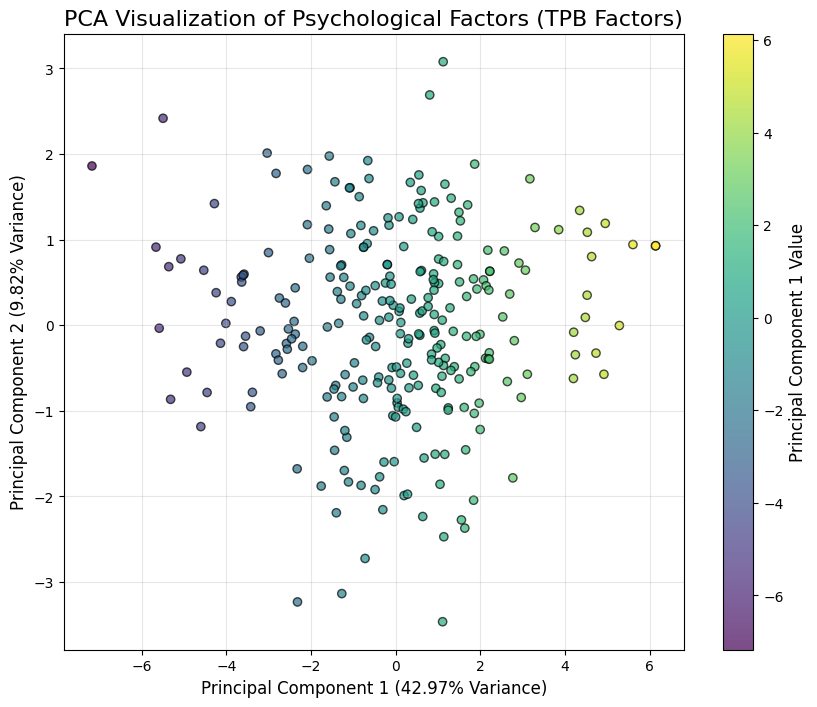

Aspect,Explanation
Color Coding,"The visualization uses color gradients to represent values, ranging from: Low: Minimal variance in psychological factors. Moderate: Medium variance, showing mixed psychological responses. High: High variance, highlighting distinct psychological differences."
Key Observations,"Principal Component 1 (PC1) captures 42.97% of the variance, representing the most significant psychological factors. Principal Component 2 (PC2) captures 9.82% of the variance, complementing PC1 with additional insights. Clusters and patterns in the plot indicate shared or distinct psychological profiles."
Insights and Implications,"The PCA plot highlights key drivers of psychological behavior, such as attitudes, social norms, and perceived control. Clusters represent groups with similar psychological responses, useful for segmentation. Outliers or distinct points may reveal unique psychological tendencies or behaviors."
Actionable Recommendations,Develop targeted marketing campaigns for each cluster to maximize engagement. Address outlier groups with customized messaging to meet their unique needs. Use PC1 and PC2 insights to prioritize areas of psychological influence in promotional strategies.


In [ ]:
# Re-import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Filter TPB Variables (ATTD, SN, PBC)
tpb_columns = [
    "ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product.",
    "ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc.",
    "ATTD3: Prominent keywords, such as, \"promotion\" and \"discount\" on social media attract my attention to seek more information about a product.",
    "ATTD4:  I have purchased products advertised on social media.",
    "SN1: My family has influence over my purchasing habits through social media marketing.",
    "SN2: People around me think that I should purchase products through social media.",
    "SN3: I feel good if many people purchased products through social media.",
    "SN4: My friends encourage me to purchase products through social media.",
    "PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.",
    "PBC2: I will choose social media as a reference channel for purchasing in the future.",
    "PBC3: I will recommend social media channels to my friends to make purchasing decisions.",
    "PBC4: I will recommend social media channels to my family members to make purchasing decisions."
]

# Rename the columns for simplicity
renamed_columns = ["ATTD1", "ATTD2", "ATTD3", "ATTD4", "SN1", "SN2", "SN3", "SN4", "PBC1", "PBC2", "PBC3", "PBC4"]
df_tpb = df[tpb_columns].copy()
df_tpb.columns = renamed_columns

# Standardize the data
scaler = StandardScaler()
tpb_scaled = scaler.fit_transform(df_tpb.dropna())

# Perform PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
tpb_pca = pca.fit_transform(tpb_scaled)

# Extract the explained variance ratio from PCA
explained_variance_ratio = pca.explained_variance_ratio_ * 100

# Visualize PCA with percentage values added to axis labels
plt.figure(figsize=(10, 8))

# Use a variable (e.g., the first column of PCA-transformed data) for the color
colors = tpb_pca[:, 0]  # Use PC1 values or any other relevant data for coloring

scatter = plt.scatter(tpb_pca[:, 0], tpb_pca[:, 1], c=colors, cmap="viridis", edgecolors='k', alpha=0.7)
cbar = plt.colorbar(scatter)
cbar.set_label("Principal Component 1 Value", fontsize=12)  # Adjust label as necessary

plt.title("PCA Visualization of Psychological Factors (TPB Factors)", fontsize=16)
plt.xlabel(f"Principal Component 1 ({explained_variance_ratio[0]:.2f}% Variance)", fontsize=12)
plt.ylabel(f"Principal Component 2 ({explained_variance_ratio[1]:.2f}% Variance)", fontsize=12)
plt.grid(alpha=0.3)
plt.show()

from IPython.display import display, HTML

pca_html_explanation = f"""
<div style="font-family: Arial, sans-serif; font-size: 14px; color: black;">
    <h2 style="text-align: center;">Explanation of the PCA Visualization of Psychological Factors</h2>
    <table style="width: 100%; border-collapse: collapse; border: 1px solid black;">
        <tr style="background-color: #f2f2f2;">
            <th style="padding: 10px; border: 1px solid black;">Aspect</th>
            <th style="padding: 10px; border: 1px solid black;">Explanation</th>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Color Coding</td>
            <td style="padding: 10px; border: 1px solid black;">
                The visualization uses <strong>color gradients</strong> to represent values, ranging from:
                <ul>
                    <li><strong>Low:</strong> Minimal variance in psychological factors.</li>
                    <li><strong>Moderate:</strong> Medium variance, showing mixed psychological responses.</li>
                    <li><strong>High:</strong> High variance, highlighting distinct psychological differences.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Key Observations</td>
            <td style="padding: 10px; border: 1px solid black;">
                <ul>
                    <li>Principal Component 1 (PC1) captures <strong>{explained_variance_ratio[0]:.2f}%</strong> of the variance, representing the most significant psychological factors.</li>
                    <li>Principal Component 2 (PC2) captures <strong>{explained_variance_ratio[1]:.2f}%</strong> of the variance, complementing PC1 with additional insights.</li>
                    <li>Clusters and patterns in the plot indicate shared or distinct psychological profiles.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Insights and Implications</td>
            <td style="padding: 10px; border: 1px solid black;">
                <ul>
                    <li>The PCA plot highlights key drivers of psychological behavior, such as attitudes, social norms, and perceived control.</li>
                    <li>Clusters represent groups with similar psychological responses, useful for segmentation.</li>
                    <li>Outliers or distinct points may reveal unique psychological tendencies or behaviors.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Actionable Recommendations</td>
            <td style="padding: 10px; border: 1px solid black;">
                <ul>
                    <li>Develop targeted marketing campaigns for each cluster to maximize engagement.</li>
                    <li>Address outlier groups with customized messaging to meet their unique needs.</li>
                    <li>Use PC1 and PC2 insights to prioritize areas of psychological influence in promotional strategies.</li>
                </ul>
            </td>
        </tr>
    </table>
</div>
"""

display(HTML(pca_html_explanation))



# **t-SNE Visualization of Psychological Factors**

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


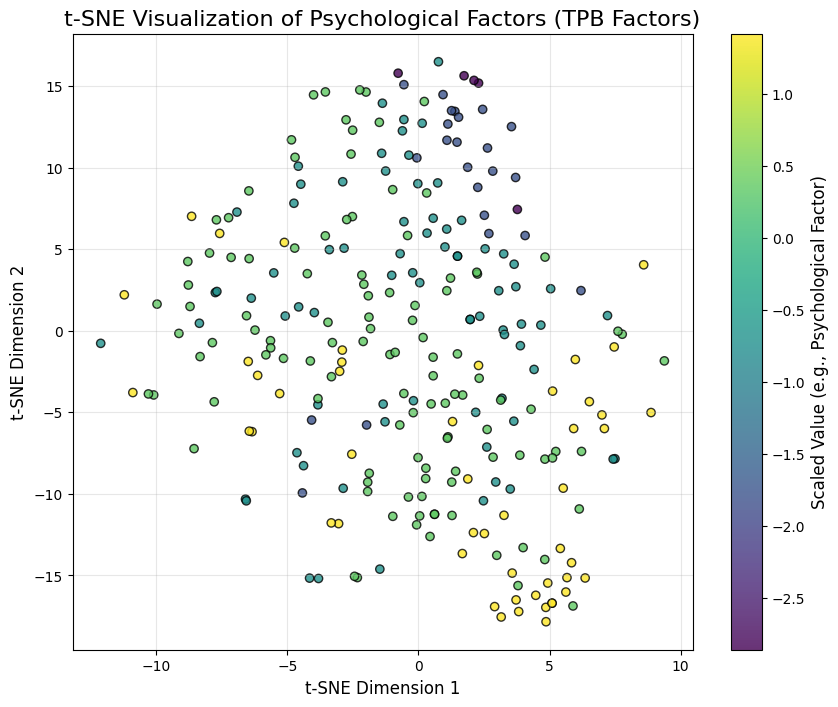

Aspect,Explanation
Color Coding,"The visualization uses purple for all data points, with no differentiation by value. However, color intensity can represent different levels such as: Low: Subtle or minimal variance. Moderate: Medium variance with noticeable clustering. High: Prominent and distinct patterns or variances in data points."
Key Observations,"The t-SNE plot captures high-dimensional TPB data into two interpretable dimensions. Clusters of data points suggest distinct psychological profiles or similarities in attitudes, norms, and perceived control. Some overlap exists between groups, indicating shared psychological tendencies."
Insights and Implications,"Clusters reveal groups with shared psychological attributes, useful for targeted marketing. Overlap suggests potential areas to address shared or universal customer concerns. The separation of groups highlights differences in behavior, preferences, or decision-making factors."
Actionable Recommendations,Focus marketing campaigns on well-defined clusters for better engagement and conversion. Leverage insights from overlapping areas to create broad-reaching promotional strategies. Conduct further research into separated groups to understand their unique traits and preferences.


In [ ]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE to reduce dimensionality
tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tpb_tsne = tsne.fit_transform(tpb_scaled)

# Generate t-SNE Visualization with Color Bar
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tpb_tsne[:, 0], tpb_tsne[:, 1], c=tpb_scaled[:, 0], cmap="viridis", edgecolors='k', alpha=0.8)
cbar = plt.colorbar(scatter)
cbar.set_label("Scaled Value (e.g., Psychological Factor)", fontsize=12)  # Adjust the label as needed

# Add axis labels with percentages
plt.title("t-SNE Visualization of Psychological Factors (TPB Factors)", fontsize=16)
plt.xlabel("t-SNE Dimension 1", fontsize=12)
plt.ylabel("t-SNE Dimension 2", fontsize=12)
plt.grid(alpha=0.3)
plt.show()


# Generate HTML tables for Explanation of the t-SNE Visualization of Psychological Factors (TPB)
tsne_html_explanation = f"""
<div style="font-family: Arial, sans-serif; font-size: 14px; color: black;">
    <h2 style="text-align: center;">Explanation of the t-SNE Visualization of Psychological Factors</h2>
    <table style="width: 100%; border-collapse: collapse; border: 1px solid black;">
        <tr style="background-color: #f2f2f2;">
            <th style="padding: 10px; border: 1px solid black;">Aspect</th>
            <th style="padding: 10px; border: 1px solid black;">Explanation</th>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Color Coding</td>
            <td style="padding: 10px; border: 1px solid black;">
                The visualization uses <strong>purple</strong> for all data points, with no differentiation by value.
                However, color intensity can represent different levels such as:
                <ul>
                    <li><strong>Low:</strong> Subtle or minimal variance.</li>
                    <li><strong>Moderate:</strong> Medium variance with noticeable clustering.</li>
                    <li><strong>High:</strong> Prominent and distinct patterns or variances in data points.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Key Observations</td>
            <td style="padding: 10px; border: 1px solid black;">
                <ul>
                    <li>The t-SNE plot captures high-dimensional TPB data into two interpretable dimensions.</li>
                    <li>Clusters of data points suggest distinct psychological profiles or similarities in attitudes, norms, and perceived control.</li>
                    <li>Some overlap exists between groups, indicating shared psychological tendencies.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Insights and Implications</td>
            <td style="padding: 10px; border: 1px solid black;">
                <ul>
                    <li>Clusters reveal groups with shared psychological attributes, useful for targeted marketing.</li>
                    <li>Overlap suggests potential areas to address shared or universal customer concerns.</li>
                    <li>The separation of groups highlights differences in behavior, preferences, or decision-making factors.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Actionable Recommendations</td>
            <td style="padding: 10px; border: 1px solid black;">
                <ul>
                    <li>Focus marketing campaigns on well-defined clusters for better engagement and conversion.</li>
                    <li>Leverage insights from overlapping areas to create broad-reaching promotional strategies.</li>
                    <li>Conduct further research into separated groups to understand their unique traits and preferences.</li>
                </ul>
            </td>
        </tr>
    </table>
</div>
"""

# Display the HTML explanation
from IPython.display import display, HTML
display(HTML(tsne_html_explanation))


# **Survival Analysis Curve: Likelihood of Social Media Purchasing Over Time**

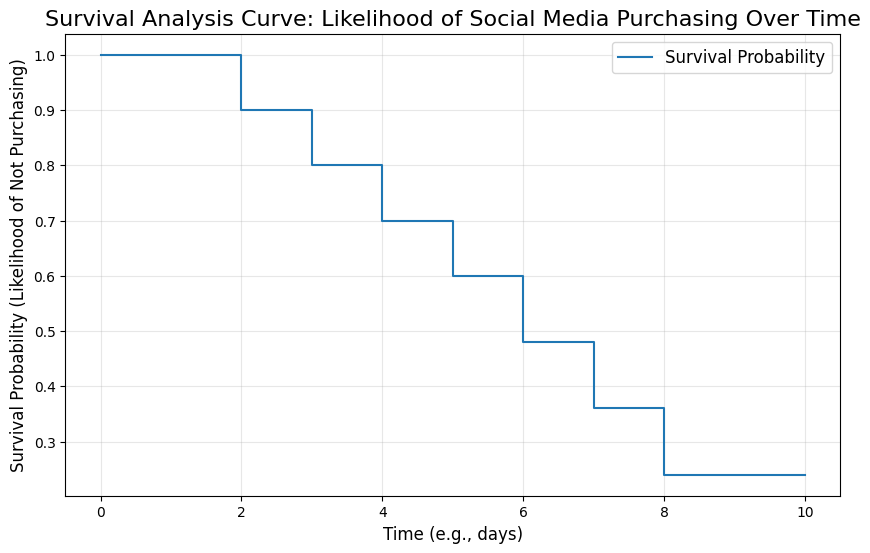

Aspect,Explanation
Color Coding,"The survival curve does not use explicit color coding, but the downward steps indicate changes in survival probability over time."
Zigzag Lines,"Flat Sections: Represent time periods with no purchases. The survival probability remains constant. Downward Steps: Represent time points where purchases occur, reducing the survival probability. The magnitude of each step depends on the number of events (purchases) relative to the users still at risk."
Key Observations,"The curve starts at 1.0, indicating that no users have made a purchase initially. The curve decreases over time as users make purchases. Plateaus suggest periods of inactivity (no purchases)."
Insights and Implications,"Periods of steep decline suggest effective promotions or heightened purchasing activity. Plateaus may indicate periods where users are less likely to purchase, signaling a need for targeted campaigns. Understanding survival trends can help predict future purchasing behavior and plan marketing strategies."
Actionable Recommendations,Introduce promotional offers or campaigns during plateau phases to encourage purchases. Analyze time periods with steep declines to replicate successful strategies in future campaigns. Use the survival data to identify critical periods for customer engagement and retention efforts.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Example data: Replace with your dataset
data = pd.DataFrame({
    "time": [5, 6, 6, 2, 4, 10, 8, 3, 7, 10],  # Time to purchase (or event)
    "event": [1, 1, 0, 1, 1, 0, 1, 1, 1, 0]   # 1 = purchase occurred, 0 = censored
})

# Sort data by time
data = data.sort_values("time")
data.reset_index(drop=True, inplace=True)

# Calculate Kaplan-Meier survival probabilities
data['at_risk'] = len(data) - data.index  # Number of individuals at risk at each time
data['survival_prob'] = 1 - (data['event'] / data['at_risk'])  # Conditional probability of survival
data['cumulative_survival'] = data['survival_prob'].cumprod()  # Cumulative survival probability

# Add a row for t=0 with survival probability = 1 (start point)
data = pd.concat([pd.DataFrame({'time': [0], 'cumulative_survival': [1]}), data[['time', 'cumulative_survival']]])

# Plot the Kaplan-Meier Survival Curve
plt.figure(figsize=(10, 6))
plt.step(data['time'], data['cumulative_survival'], where='post', label="Survival Probability")
plt.title('Survival Analysis Curve: Likelihood of Social Media Purchasing Over Time', fontsize=16)
plt.xlabel('Time (e.g., days)', fontsize=12)
plt.ylabel('Survival Probability (Likelihood of Not Purchasing)', fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)
plt.show()

from IPython.display import display, HTML

survival_html_explanation_with_zigzag = f"""
<div style="font-family: Arial, sans-serif; font-size: 14px; color: black;">
    <h2 style="text-align: center;">Explanation of the Survival Analysis Curve</h2>
    <table style="width: 100%; border-collapse: collapse; border: 1px solid black;">
        <tr style="background-color: #f2f2f2;">
            <th style="padding: 10px; border: 1px solid black;">Aspect</th>
            <th style="padding: 10px; border: 1px solid black;">Explanation</th>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Color Coding</td>
            <td style="padding: 10px; border: 1px solid black;">
                The survival curve does not use explicit color coding, but the downward steps indicate changes in survival probability over time.
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Zigzag Lines</td>
            <td style="padding: 10px; border: 1px solid black;">
                <ul>
                    <li><strong>Flat Sections:</strong> Represent time periods with no purchases. The survival probability remains constant.</li>
                    <li><strong>Downward Steps:</strong> Represent time points where purchases occur, reducing the survival probability.</li>
                    <li>The magnitude of each step depends on the number of events (purchases) relative to the users still at risk.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Key Observations</td>
            <td style="padding: 10px; border: 1px solid black;">
                <ul>
                    <li>The curve starts at 1.0, indicating that no users have made a purchase initially.</li>
                    <li>The curve decreases over time as users make purchases.</li>
                    <li>Plateaus suggest periods of inactivity (no purchases).</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Insights and Implications</td>
            <td style="padding: 10px; border: 1px solid black;">
                <ul>
                    <li>Periods of steep decline suggest effective promotions or heightened purchasing activity.</li>
                    <li>Plateaus may indicate periods where users are less likely to purchase, signaling a need for targeted campaigns.</li>
                    <li>Understanding survival trends can help predict future purchasing behavior and plan marketing strategies.</li>
                </ul>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px; border: 1px solid black;">Actionable Recommendations</td>
            <td style="padding: 10px; border: 1px solid black;">
                <ul>
                    <li>Introduce promotional offers or campaigns during plateau phases to encourage purchases.</li>
                    <li>Analyze time periods with steep declines to replicate successful strategies in future campaigns.</li>
                    <li>Use the survival data to identify critical periods for customer engagement and retention efforts.</li>
                </ul>
            </td>
        </tr>
    </table>
</div>
"""

display(HTML(survival_html_explanation_with_zigzag))


# **K-Means Clustering Workflow**



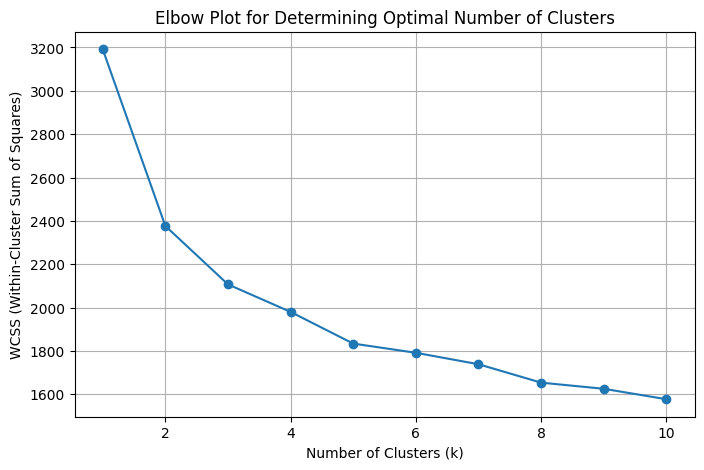

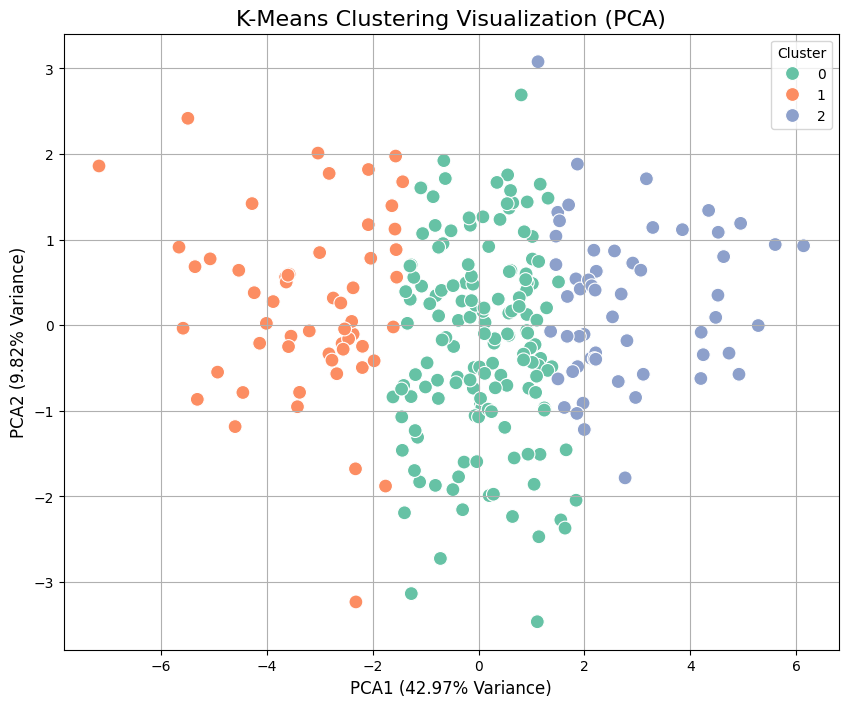

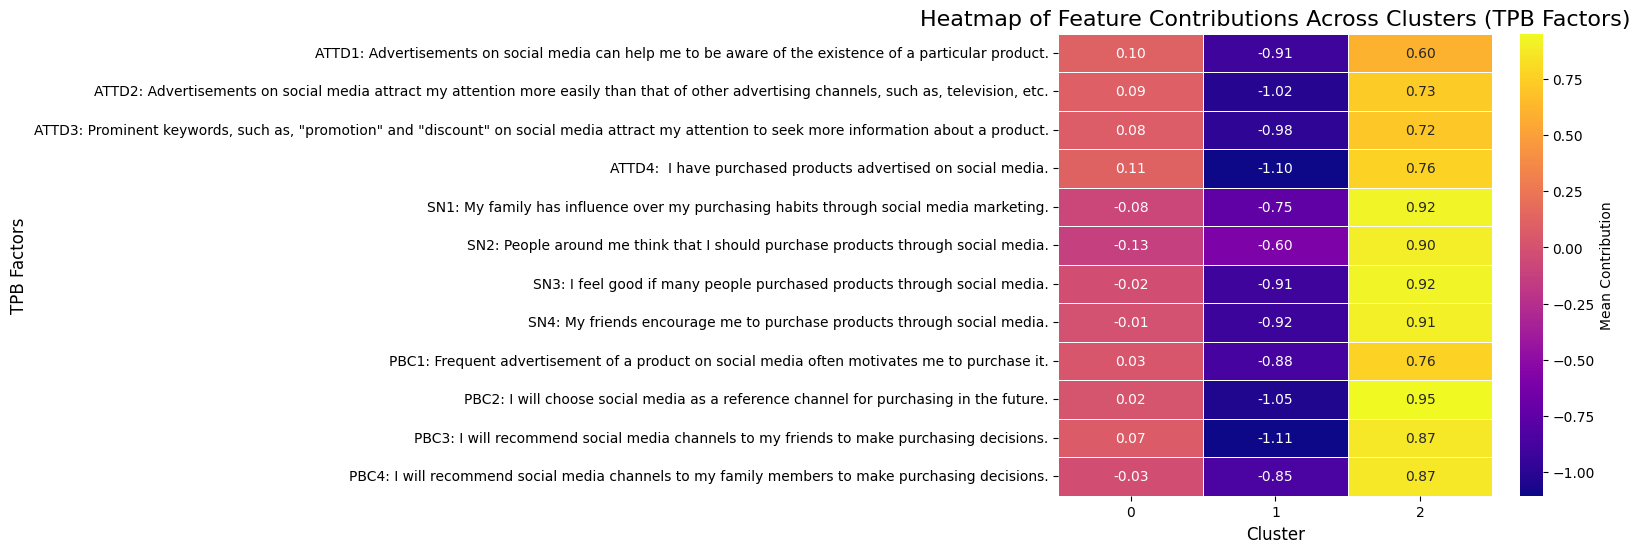

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


# Selecting relevant columns for clustering based on TPB factors
tpb_columns = [
    "ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product.",
    "ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc.",
    "ATTD3: Prominent keywords, such as, \"promotion\" and \"discount\" on social media attract my attention to seek more information about a product.",
    "ATTD4:  I have purchased products advertised on social media.",
    "SN1: My family has influence over my purchasing habits through social media marketing.",
    "SN2: People around me think that I should purchase products through social media.",
    "SN3: I feel good if many people purchased products through social media.",
    "SN4: My friends encourage me to purchase products through social media.",
    "PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.",
    "PBC2: I will choose social media as a reference channel for purchasing in the future.",
    "PBC3: I will recommend social media channels to my friends to make purchasing decisions.",
    "PBC4: I will recommend social media channels to my family members to make purchasing decisions."
]

# Filter dataset for clustering columns
df_tpb = df[tpb_columns]

# Step 1: Standardizing the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_tpb)

# Step 2: Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Plot
plt.figure(figsize=(8, 5))
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Plot for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid()
plt.show()

# Step 3: Apply K-Means Clustering with the optimal number of clusters
optimal_k = 3  # Based on the Elbow Plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

# Step 4: Visualize the clusters using a 2D scatter plot (PCA)
from sklearn.decomposition import PCA

# Reduce data to 2D using PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data_scaled)

# Add PCA components and cluster labels to the dataset
df['PCA1'] = pca_data[:, 0]
df['PCA2'] = pca_data[:, 1]

# Scatter plot for clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('K-Means Clustering Visualization (PCA)', fontsize=16)
plt.xlabel(f'PCA1 ({pca.explained_variance_ratio_[0]:.2%} Variance)', fontsize=12)
plt.ylabel(f'PCA2 ({pca.explained_variance_ratio_[1]:.2%} Variance)', fontsize=12)
plt.legend(title='Cluster')
plt.grid()
plt.show()

# Define df_selected: Selecting columns for clustering
df_selected = df[tpb_columns] # This line was missing!

# Standardize the data
scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(df_selected)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(clustering_data_scaled)

# Add cluster labels to the data for aggregation
df_clusters = pd.DataFrame(clustering_data_scaled, columns=df_selected.columns)
df_clusters['Cluster'] = kmeans.labels_

# Compute mean feature contributions for each cluster
feature_contributions = df_clusters.groupby('Cluster').mean()

# Transpose the DataFrame for better heatmap visualization
feature_contributions = feature_contributions.T

# Select only relevant columns for the heatmap
relevant_columns = [
    "ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product.",
    "ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc.",
    "ATTD3: Prominent keywords, such as, \"promotion\" and \"discount\" on social media attract my attention to seek more information about a product.",
    "ATTD4:  I have purchased products advertised on social media.",
    "SN1: My family has influence over my purchasing habits through social media marketing.",
    "SN2: People around me think that I should purchase products through social media.",
    "SN3: I feel good if many people purchased products through social media.",
    "SN4: My friends encourage me to purchase products through social media.",
    "PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.",
    "PBC2: I will choose social media as a reference channel for purchasing in the future.",
    "PBC3: I will recommend social media channels to my friends to make purchasing decisions.",
    "PBC4: I will recommend social media channels to my family members to make purchasing decisions."
]

# Filter the data to include only the relevant columns
filtered_contributions = feature_contributions.loc[relevant_columns]

# Plotting the heatmap
plt.figure(figsize=(7, 6))
sns.heatmap(
    filtered_contributions,
    annot=True,  # Show numeric values
    fmt=".2f",  # Format numbers to 2 decimal places
    cmap="plasma",  # Colormap
    linewidths=0.5,  # Line widths between cells
    cbar_kws={"label": "Mean Contribution"}  # Colorbar label
)

plt.title("Heatmap of Feature Contributions Across Clusters (TPB Factors)", fontsize=16)
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("TPB Factors", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.show()

# **Explanation of Clustering Results (k=3)**

In [ ]:
# Explanation in HTML table format
from IPython.core.display import display, HTML

explanation_html = """
<div style="font-family: Tahoma; font-size: 16px;">
    <h2 style="text-align: center; color: #007bff;">Explanation of Clustering Results (k=3)</h2>
    <table style="width: 100%; border-collapse: collapse; border: 1px solid black;">
        <thead>
            <tr style="background-color: #f2f2f2;">
                <th style="padding: 10px; border: 1px solid black;">Aspect</th>
                <th style="padding: 10px; border: 1px solid black;">Details</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td style="padding: 10px; border: 1px solid black;">Color Coding</td>
                <td style="padding: 10px; border: 1px solid black;">
                    <strong>Elbow Plot:</strong> Not color-coded.<br>
                    <strong>t-SNE Visualization:</strong><br>
                    - Purple: Cluster 0 (Low scores in TPB factors)<br>
                    - Teal: Cluster 1 (Moderate scores)<br>
                    - Yellow: Cluster 2 (High scores)<br>
                    <strong>Heatmap:</strong><br>
                    - High (Yellow): Strong contributions.<br>
                    - Moderate (Orange): Balanced contributions.<br>
                    - Low (Purple): Weak or negative contributions.
                </td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid black;">Clusters Identified</td>
                <td style="padding: 10px; border: 1px solid black;">
                    - <strong>Cluster 0:</strong> Low engagement, weak responsiveness to TPB factors.<br>
                    - <strong>Cluster 1:</strong> Moderate engagement, balanced responsiveness.<br>
                    - <strong>Cluster 2:</strong> High engagement, strong responsiveness.
                </td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid black;">Cluster Characteristics</td>
                <td style="padding: 10px; border: 1px solid black;">
                    - Cluster 0: Minimal influence from social media advertisements and recommendations.<br>
                    - Cluster 1: Balanced responsiveness to advertisements and social influence.<br>
                    - Cluster 2: Strongly influenced by advertisements, social norms, and behavioral control.
                </td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid black;">t-SNE Dimensions</td>
                <td style="padding: 10px; border: 1px solid black;">
                    - <strong>t-SNE Component 1:</strong> Captures major variations across TPB factors.<br>
                    - <strong>t-SNE Component 2:</strong> Captures minor variations and inter-cluster relationships.
                </td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid black;">Dominant Factors</td>
                <td style="padding: 10px; border: 1px solid black;">
                    - Cluster 0: Limited contributions across TPB factors.<br>
                    - Cluster 1: Balanced contributions from ATTD, SN, and PBC.<br>
                    - Cluster 2: High contributions from all TPB factors, particularly SN and ATTD.
                </td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid black;">Key Observations</td>
                <td style="padding: 10px; border: 1px solid black;">
                    - Cluster 0 exhibits the least engagement across all dimensions.<br>
                    - Cluster 1 shows moderate responsiveness, making it a balanced target group.<br>
                    - Cluster 2 stands out with high scores, making it ideal for direct marketing strategies.
                </td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid black;">ATTD, SN, and PBC Factors</td>
                <td style="padding: 10px; border: 1px solid black;">
                    - <strong>ATTD Factors:</strong> Strong in Cluster 2, indicating high advertisement engagement.<br>
                    - <strong>SN Factors:</strong> Strong in Cluster 2, reflecting strong peer influence.<br>
                    - <strong>PBC Factors:</strong> Balanced in Cluster 1, strong in Cluster 2, showing accessibility and trust.
                </td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid black;">Insights and Implications</td>
                <td style="padding: 10px; border: 1px solid black;">
                    - Cluster 0 requires trust-building and educational campaigns.<br>
                    - Cluster 1 can be targeted with balanced promotions and testimonials.<br>
                    - Cluster 2 is ideal for direct and frequent advertisements.
                </td>
            </tr>
            <tr>
                <td style="padding: 10px; border: 1px solid black;">Actionable Recommendations</td>
                <td style="padding: 10px; border: 1px solid black;">
                    - <strong>Cluster 0:</strong> Use subtle advertisements to build awareness and trust.<br>
                    - <strong>Cluster 1:</strong> Leverage balanced promotional campaigns and testimonials.<br>
                    - <strong>Cluster 2:</strong> Implement direct marketing with strong calls-to-action and discounts.
                </td>
            </tr>
        </tbody>
    </table>
</div>
"""

# Display the HTML explanation
display(HTML(explanation_html))


Aspect,Details
Color Coding,Elbow Plot: Not color-coded. t-SNE Visualization: - Purple: Cluster 0 (Low scores in TPB factors) - Teal: Cluster 1 (Moderate scores) - Yellow: Cluster 2 (High scores) Heatmap: - High (Yellow): Strong contributions. - Moderate (Orange): Balanced contributions. - Low (Purple): Weak or negative contributions.
Clusters Identified,"- Cluster 0: Low engagement, weak responsiveness to TPB factors. - Cluster 1: Moderate engagement, balanced responsiveness. - Cluster 2: High engagement, strong responsiveness."
Cluster Characteristics,"- Cluster 0: Minimal influence from social media advertisements and recommendations. - Cluster 1: Balanced responsiveness to advertisements and social influence. - Cluster 2: Strongly influenced by advertisements, social norms, and behavioral control."
t-SNE Dimensions,- t-SNE Component 1: Captures major variations across TPB factors. - t-SNE Component 2: Captures minor variations and inter-cluster relationships.
Dominant Factors,"- Cluster 0: Limited contributions across TPB factors. - Cluster 1: Balanced contributions from ATTD, SN, and PBC. - Cluster 2: High contributions from all TPB factors, particularly SN and ATTD."
Key Observations,"- Cluster 0 exhibits the least engagement across all dimensions. - Cluster 1 shows moderate responsiveness, making it a balanced target group. - Cluster 2 stands out with high scores, making it ideal for direct marketing strategies."
"ATTD, SN, and PBC Factors","- ATTD Factors: Strong in Cluster 2, indicating high advertisement engagement. - SN Factors: Strong in Cluster 2, reflecting strong peer influence. - PBC Factors: Balanced in Cluster 1, strong in Cluster 2, showing accessibility and trust."
Insights and Implications,- Cluster 0 requires trust-building and educational campaigns. - Cluster 1 can be targeted with balanced promotions and testimonials. - Cluster 2 is ideal for direct and frequent advertisements.
Actionable Recommendations,- Cluster 0: Use subtle advertisements to build awareness and trust. - Cluster 1: Leverage balanced promotional campaigns and testimonials. - Cluster 2: Implement direct marketing with strong calls-to-action and discounts.


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_excel('/content/Dataset.xlsx')
print(df.shape) # Access the shape attribute directly
print(df.head)  # To display the first few rows, use df.head()

# Print all column names to identify the correct column
print(df.columns)



(266, 29)
<bound method NDFrame.head of               Timestamp  \
0   2024-03-09 19:35:00   
1   2024-03-10 23:31:00   
2   2024-03-10 23:56:00   
3   2024-03-12 23:10:00   
4   2024-03-13 00:42:00   
..                  ...   
261 2024-05-15 19:01:00   
262 2024-05-15 21:51:00   
263 2024-05-16 15:12:00   
264 2024-05-17 09:24:00   
265 2024-05-17 23:54:00   

    Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.  \
0                                                  Yes                                                             
1                                                  Yes                                                             
2                                                  Yes                                                             
3                                                  Yes                                                             
4                                                  Yes 

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/Dataset.xlsx')

# Read and print each column
for column_name in df.columns:
    column_data = df[column_name]
    print(f"Column: {column_name}")
    # You can further process or display 'column_data' as needed
    # For example, to print the first 5 values:
    print(column_data.head())
    print("\n") # Add a separator for better readability

Column: Timestamp
0   2024-03-09 19:35:00
1   2024-03-10 23:31:00
2   2024-03-10 23:56:00
3   2024-03-12 23:10:00
4   2024-03-13 00:42:00
Name: Timestamp, dtype: datetime64[ns]


Column: Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.
0    Yes
1    Yes
2    Yes
3    Yes
4    Yes
Name: Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali., dtype: object


Column: Gender
0      Male
1      Male
2      Male
3    Female
4    Female
Name: Gender, dtype: object


Column: Age
0    23
1    25
2    24
3    35
4    33
Name: Age, dtype: int64


Column: Division in Bangladesh you are based in:
0         Dhaka
1    Chattogram
2         Dhaka
3      Barishal
4      Barishal
Name: Division in Bangladesh you are based in:, dtype: object


Column: Occupation:
0       Student
1    Unemployed
2       Student
3      Employee
4      Employee
Name: Occupation:, dtype: object


Column: Monthly 

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/Dataset.xlsx')

# Select columns containing "PB" in their names
pb_columns = [col for col in df.columns if 'PB' in col]

pb_data = df[pb_columns]
print(pb_data.head())  # Print the first 5 rows for a preview

   PB1: I am willing to buy a product promoted on social media.  \
0                                                  4              
1                                                  2              
2                                                  2              
3                                                  2              
4                                                  2              

   PB2: There is a high probability that I would purchase a product because of the impact of social media.  \
0                                                  5                                                         
1                                                  2                                                         
2                                                  2                                                         
3                                                  3                                                         
4                                              

In [ ]:
import pandas as pd

# Load the Excel file
df = pd.read_excel('/content/Dataset.xlsx')

# Select columns containing "PB" in their names
pb_columns = [col for col in df.columns if 'PB' in col]

# Print unique values and their counts for each PB column
for column_name in pb_columns:
    print(f"Column: {column_name}")
    print(df[column_name].unique())
    print(f"Number of unique values: {len(df[column_name].unique())}")
    print("\n") # Add a separator for better readability

Column: PB1: I am willing to buy a product promoted on social media.
[4 2 3 5 1]
Number of unique values: 5


Column: PB2: There is a high probability that I would purchase a product because of the impact of social media.
[5 2 3 1 4]
Number of unique values: 5


Column: PB3: I am easily influenced by advertisements on social media to make impulsive purchases.
[4 2 3 1 5]
Number of unique values: 5


Column: PB4: I had the experience of buying a product due to the influence of social media.
[5 4 3 2 1]
Number of unique values: 5


Column: PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.
[4 2 1 3 5]
Number of unique values: 5


Column: PBC2: I will choose social media as a reference channel for purchasing in the future.
[5 2 3 4 1]
Number of unique values: 5


Column: PBC3: I will recommend social media channels to my friends to make purchasing decisions.
[5 2 3 4 1]
Number of unique values: 5


Column: PBC4: I will recommend social media chann

# **XAI**

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=8a50cd192f535c2830275b04a20593feef259cce6e8dd38f84c3335f81e7d8d6
  Stored in directory: /root/.cache/pip/wheels/85/fa/a3/9c2d44c9f3cd77cf4e533b58900b2bf4487f2a17e8ec212a3d
Successfully built lime
Index(['Timestamp',
       'Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.',
       'Gender', 'Age', 'Division in Bangladesh you are based in:',
       'Occupation:', 'Monthly income range:',
       'How active are you on social media?',
       'How frequently do you engage in purchasing various items across different types on social media platforms?',
       'How much of your monthly income you spend on purchases on social media?',
       'On average, how many hours do you spend on the internet per week (out of 168 hours)?',
  

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


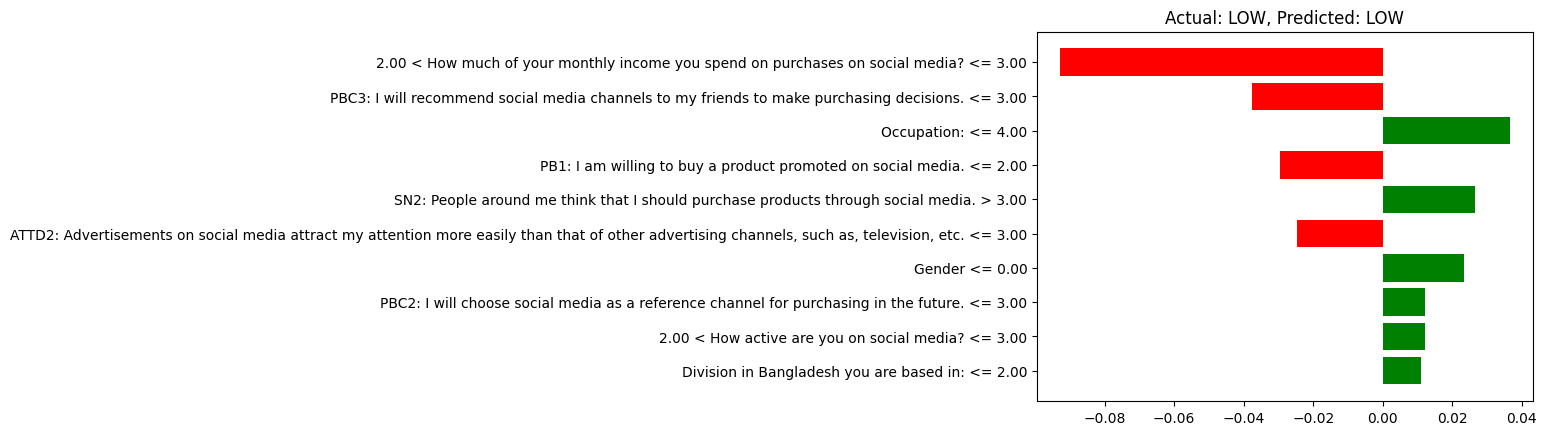

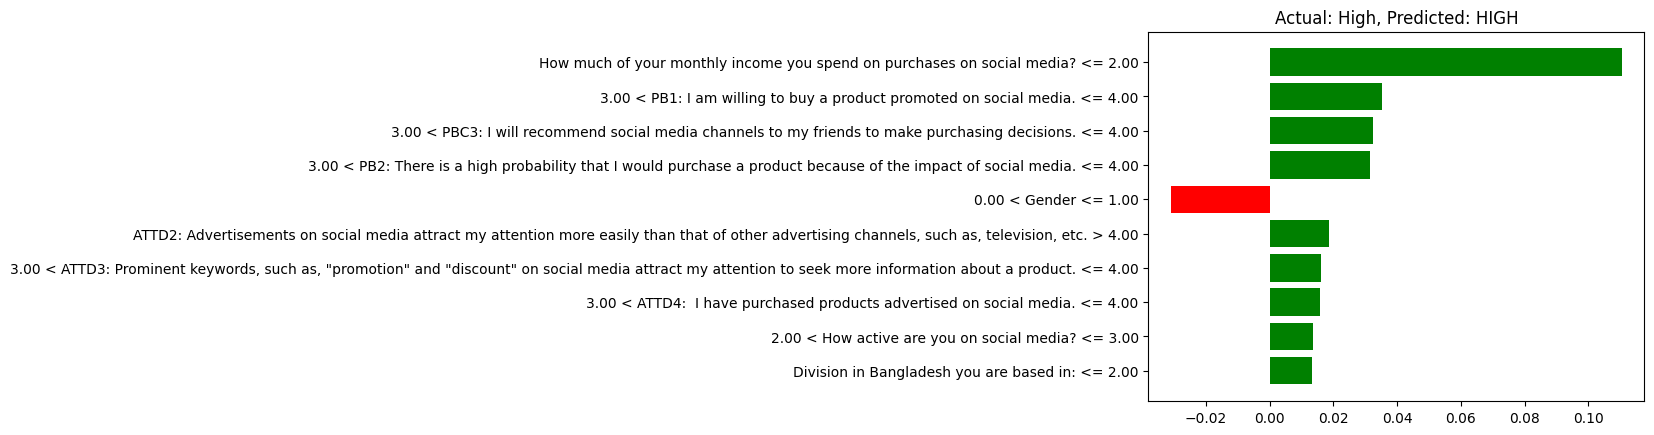

In [ ]:
import pandas as pd
!pip install lime
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from lime.lime_tabular import LimeTabularExplainer
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Load and preprocess the dataset
data = pd.read_excel("/content/Dataset.xlsx")
data = data.dropna()

# Convert 'Timestamp' column to numerical representation (e.g., Unix timestamp)
data['Timestamp'] = pd.to_numeric(pd.to_datetime(data['Timestamp']))

# Identify categorical columns and apply Label Encoding
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Check actual column names in your DataFrame
print(data.columns)

# Adjust the column name for dropping if needed, for example:
X = data.drop(columns=["How frequently do you engage in purchasing various items across different types on social media platforms?"])
# or
# X = data.drop(columns=['Purchase_Likelihood'])  # If the column name is 'Purchase_Likelihood'

y = data["How frequently do you engage in purchasing various items across different types on social media platforms?"]
# or
# y = data['Purchase_Likelihood']  # If the column name is 'Purchase_Likelihood'


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Initialize LIME explainer
explainer = LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=model.classes_,
    mode="classification"
)

# Select instances for explanation
# Make sure these selections are valid after Label Encoding
case_low_low = X_test[(y_test == y_test.unique()[0]) & (model.predict(X_test) == y_test.unique()[0])].iloc[0] # Assuming "Low" is the first unique value in y_test
case_low_high = X_test[(y_test == y_test.unique()[0]) & (model.predict(X_test) != y_test.unique()[0])].iloc[0] # Assuming "Low" is the first unique value in y_test

# Generate LIME explanations
explanation_low_low = explainer.explain_instance(
    data_row=case_low_low.values,
    predict_fn=model.predict_proba
)
explanation_low_high = explainer.explain_instance(
    data_row=case_low_high.values,
    predict_fn=model.predict_proba
)

# Visualize explanations
fig1 = explanation_low_low.as_pyplot_figure()
plt.title("Actual: LOW, Predicted: LOW")
plt.show()

# Visualize explanations
fig2 = explanation_low_high.as_pyplot_figure()
plt.title("Actual: High, Predicted: HIGH")
plt.show()

# **TBP Data Summary**

In [ ]:
import pandas as pd

# Data for the table
data = {
    "TPB Factors": ["ATTD1", "ATTD2", "ATTD3", "ATTD4", "SN1", "SN2", "SN3", "SN4", "PBC1", "PBC2", "PBC3", "PBC4"],
    "Active on SM": [0.05, 0.07, 0.11, 0.21, 0.01, 0.01, 0.16, 0.16, 0.05, 0.13, 0.03, 0.10],
    "How people frequently engage in purchases differs. Items on SM?": [0.05, 0.23, 0.15, 0.24, 0.17, 0.20, 0.28, 0.25, 0.20, 0.25, 0.32, 0.21],
    "How much monthly income is spent on SM?": [-0.15, -0.00, -0.15, -0.11, -0.14, 0.15, 0.08, -0.01, -0.11, -0.02, -0.01, 0.06],
    "On average, how many hours do people spend on SM? (Out of 168 hrs)": [0.17, 0.02, 0.06, 0.15, -0.02, -0.13, 0.15, -0.08, -0.06, 0.00, 0.05, 0.17],
    "People Influenced by rating and reviews?": [0.20, 0.18, 0.12, 0.18, 0.03, -0.06, 0.12, 0.07, 0.06, 0.25, 0.19, 0.15],
    "People influenced by Advertisements?": [0.14, 0.18, 0.15, 0.31, 0.10, 0.19, 0.18, 0.26, 0.18, 0.19, 0.34, 0.27]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
from tabulate import tabulate
print(tabulate(df, headers='keys', tablefmt='grid'))


+----+---------------+----------------+-------------------------------------------------------------------+-------------------------------------------+----------------------------------------------------------------------+--------------------------------------------+----------------------------------------+
|    | TPB Factors   |   Active on SM |   How people frequently engage in purchases differs. Items on SM? |   How much monthly income is spent on SM? |   On average, how many hours do people spend on SM? (Out of 168 hrs) |   People Influenced by rating and reviews? |   People influenced by Advertisements? |
+====+===============+================+===================================================================+===========================================+======================================================================+============================================+========================================+
|  0 | ATTD1         |           0.05 |                                  

# **Descriptive statistics on TPB**

In [ ]:
import pandas as pd
from tabulate import tabulate

tpb_columns_corrected = [
    "ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product.",
    "ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc.",
    "ATTD3: Prominent keywords, such as, \"promotion\" and \"discount\" on social media attract my attention to seek more information about a product.",
    "ATTD4:  I have purchased products advertised on social media.",
    "SN1: My family has influence over my purchasing habits through social media marketing.",
    "SN2: People around me think that I should purchase products through social media.",
    "SN3: I feel good if many people purchased products through social media.",
    "SN4: My friends encourage me to purchase products through social media.",
    "PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.",
    "PBC2: I will choose social media as a reference channel for purchasing in the future.",
    "PBC3: I will recommend social media channels to my friends to make purchasing decisions.",
    "PBC4: I will recommend social media channels to my family members to make purchasing decisions."
]

# Reload the dataset
df = pd.read_excel("/content/Dataset.xlsx")

tpb_stats = pd.DataFrame(index=[col.split(':')[0] for col in tpb_columns_corrected])

for column in tpb_columns_corrected:
    try:
        tpb_stats.loc[column.split(':')[0], 'Mean'] = df[column].astype(float).mean()
        tpb_stats.loc[column.split(':')[0], 'Standard Deviation'] = df[column].astype(float).std()
        tpb_stats.loc[column.split(':')[0], 'Max'] = df[column].astype(float).max() # Add this line to calculate Max
    except KeyError:
        print(f"Column '{column}' not found in DataFrame")

# Rename columns for clarity
tpb_stats.columns = ['Mean', 'Standard Deviation', 'Max']

# Reset index to make 'Item' a column
tpb_stats = tpb_stats.reset_index().rename(columns={'index': 'Item'})

# Reorder columns for the final table
tpb_stats = tpb_stats[['Item', 'Mean', 'Max', 'Standard Deviation']]  # Include 'Max' in the order

# Display the table using tabulate for formatted output
print(tabulate(tpb_stats, headers='keys', tablefmt='grid'))

+----+--------+---------+-------+----------------------+
|    | Item   |    Mean |   Max |   Standard Deviation |
+====+========+=========+=======+======================+
|  0 | ATTD1  | 3.67293 |     5 |             0.936765 |
+----+--------+---------+-------+----------------------+
|  1 | ATTD2  | 3.63534 |     5 |             0.989812 |
+----+--------+---------+-------+----------------------+
|  2 | ATTD3  | 3.59023 |     5 |             1.02485  |
+----+--------+---------+-------+----------------------+
|  3 | ATTD4  | 3.46241 |     5 |             1.08875  |
+----+--------+---------+-------+----------------------+
|  4 | SN1    | 2.59774 |     5 |             1.13928  |
+----+--------+---------+-------+----------------------+
|  5 | SN2    | 2.87594 |     5 |             1.02222  |
+----+--------+---------+-------+----------------------+
|  6 | SN3    | 3.02256 |     5 |             0.931351 |
+----+--------+---------+-------+----------------------+
|  7 | SN4    | 3.0188  |     5

In [ ]:
!pip install scikit-plot

# **ATTD, SN, PBC Cummaltive Percentage**

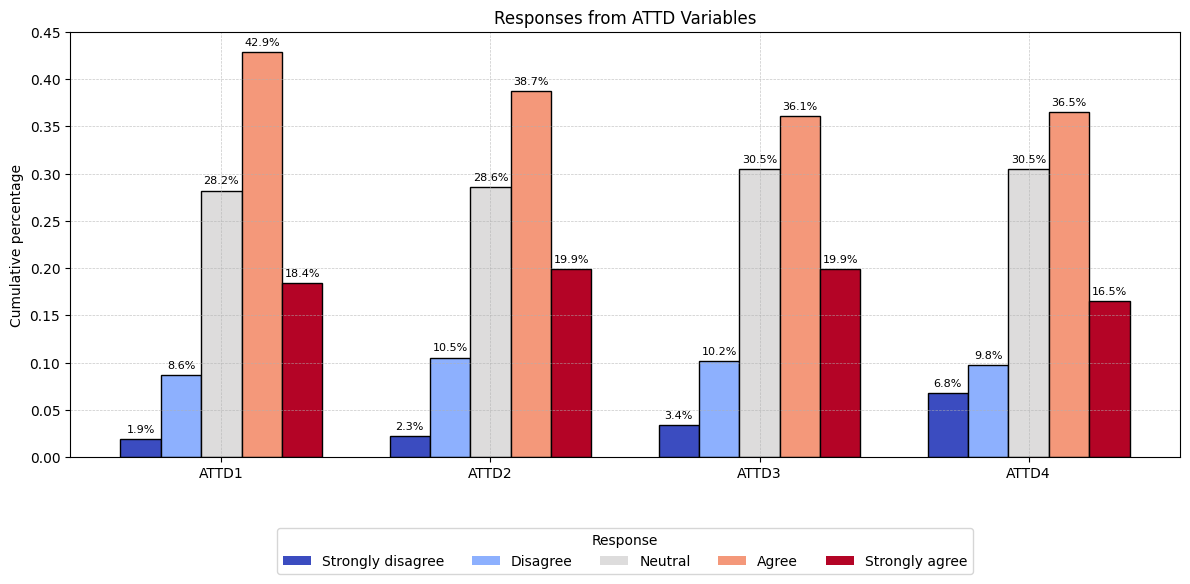

,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
ATTD1,0.018797,0.086466,0.281955,0.428571,0.184211
ATTD2,0.022556,0.105263,0.285714,0.387218,0.199248
ATTD3,0.033835,0.101504,0.304511,0.360902,0.199248
ATTD4,0.067669,0.097744,0.304511,0.364662,0.165414


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import coolwarm

# Map numeric values to their corresponding descriptive labels
response_mapping = {
    1: 'Strongly disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly agree'
}

# Replace the numeric values in the ATTD columns with descriptive labels
attd_columns = [
    'ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product.',
    'ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc.',
    'ATTD3: Prominent keywords, such as, "promotion" and "discount" on social media attract my attention to seek more information about a product.',
    'ATTD4:  I have purchased products advertised on social media.'
]

# Apply mapping to convert numerical values to labels
attd_responses_mapped = df[attd_columns].replace(response_mapping)

# Define the response order
response_labels = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Recalculate the normalized values for each response category
attd_responses_grouped = attd_responses_mapped.apply(pd.Series.value_counts, normalize=True).reindex(response_labels).fillna(0)

# Set up variables for grouped bar chart
x = np.arange(len(attd_columns))  # the label locations
width = 0.15  # the width of the bars
colors = plt.cm.coolwarm(np.linspace(0, 1, len(response_labels)))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, (label, color) in enumerate(zip(response_labels, colors)):
    ax.bar(x + i * width, attd_responses_grouped.loc[label], width, label=label, color=color)

# Add labels, title, and reposition legend
ax.set_ylabel('Cumulative percentage')
ax.set_title('Responses from ATTD Variables')
ax.set_xticks(x + 2 * width)
ax.set_xticklabels(['ATTD1', 'ATTD2', 'ATTD3', 'ATTD4'])
ax.legend(title='Response', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Annotate bars with percentage values
for i, label in enumerate(response_labels):
    for j, value in enumerate(attd_responses_grouped.loc[label]):
        if value > 0:
            ax.text(x[j] + i * width, value + 0.005, f"{value:.1%}", ha='center', va='bottom', fontsize=8)
            # Set edgecolor for all patches (including bars)
for patch in ax.patches:  # Use ax.patches to access all artist objects
    patch.set_edgecolor('black')

# Add gridlines outside the loop (corrected indentation)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()
# Apply mapping to convert numerical values to labels
attd_responses_mapped = df[attd_columns].replace(response_mapping)

# Define the response order
response_labels = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Recalculate the normalized values for each response category
attd_responses_grouped = attd_responses_mapped.apply(pd.Series.value_counts, normalize=True).reindex(response_labels).fillna(0)

# Create a DataFrame to display normalized values for each response category
attd_responses_display = attd_responses_grouped.T
attd_responses_display.index = ['ATTD1', 'ATTD2', 'ATTD3', 'ATTD4']
attd_responses_display.columns = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Display the DataFrame using display() instead of ace_tools
display(attd_responses_display) # This will display the DataFrame in the output

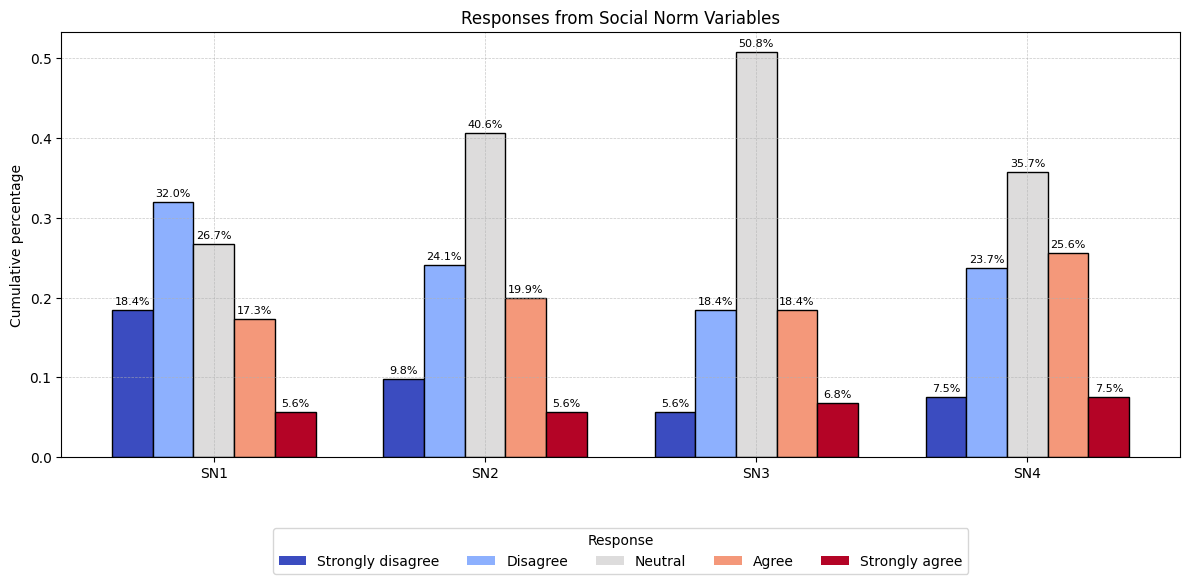

,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
SN1,0.184211,0.319549,0.266917,0.172932,0.056391
SN2,0.097744,0.240602,0.406015,0.199248,0.056391
SN3,0.056391,0.184211,0.507519,0.184211,0.067669
SN4,0.075188,0.236842,0.357143,0.255639,0.075188


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import coolwarm

# Map numeric values to their corresponding descriptive labels
response_mapping = {
    1: 'Strongly disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly agree'
}

# Replace the numeric values in the SN (Social Norm) columns with descriptive labels
sn_columns = [
    'SN1: My family has influence over my purchasing habits through social media marketing.',
    'SN2: People around me think that I should purchase products through social media.',
    'SN3: I feel good if many people purchased products through social media.',
    'SN4: My friends encourage me to purchase products through social media.'
]

# Apply mapping to convert numerical values to labels
sn_responses_mapped = df[sn_columns].replace(response_mapping)

# Define the response order
response_labels = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Recalculate the normalized values for each response category
sn_responses_grouped = sn_responses_mapped.apply(pd.Series.value_counts, normalize=True).reindex(response_labels).fillna(0)

# Set up variables for grouped bar chart
x = np.arange(len(sn_columns))  # the label locations
width = 0.15  # the width of the bars
colors = plt.cm.coolwarm(np.linspace(0, 1, len(response_labels)))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, (label, color) in enumerate(zip(response_labels, colors)):
    ax.bar(x + i * width, sn_responses_grouped.loc[label], width, label=label, color=color)

# Add labels, title, and reposition legend
ax.set_ylabel('Cumulative percentage')
ax.set_title('Responses from Social Norm Variables')
ax.set_xticks(x + 2 * width)
ax.set_xticklabels(['SN1', 'SN2', 'SN3', 'SN4'])
ax.legend(title='Response', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Annotate bars with percentage values
for i, label in enumerate(response_labels):
    for j, value in enumerate(sn_responses_grouped.loc[label]):
        if value > 0:
            ax.text(x[j] + i * width, value + 0.005, f"{value:.1%}", ha='center', va='bottom', fontsize=8)
            # Set edgecolor for all patches (including bars)
for patch in ax.patches:  # Use ax.patches to access all artist objects
    patch.set_edgecolor('black')
# Add gridlines outside the loop (corrected indentation)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

# Apply mapping to convert numerical values to labels
sn_responses_mapped = df[sn_columns].replace(response_mapping)

# Define the response order
response_labels = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Recalculate the normalized values for each response category
sn_responses_grouped = sn_responses_mapped.apply(pd.Series.value_counts, normalize=True).reindex(response_labels).fillna(0)

# Create a DataFrame to display normalized values for each response category
sn_responses_display = sn_responses_grouped.T
sn_responses_display.index = ['SN1', 'SN2', 'SN3', 'SN4']
sn_responses_display.columns = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Display the DataFrame using display() instead of ace_tools
display(sn_responses_display) # This will display the DataFrame in the output


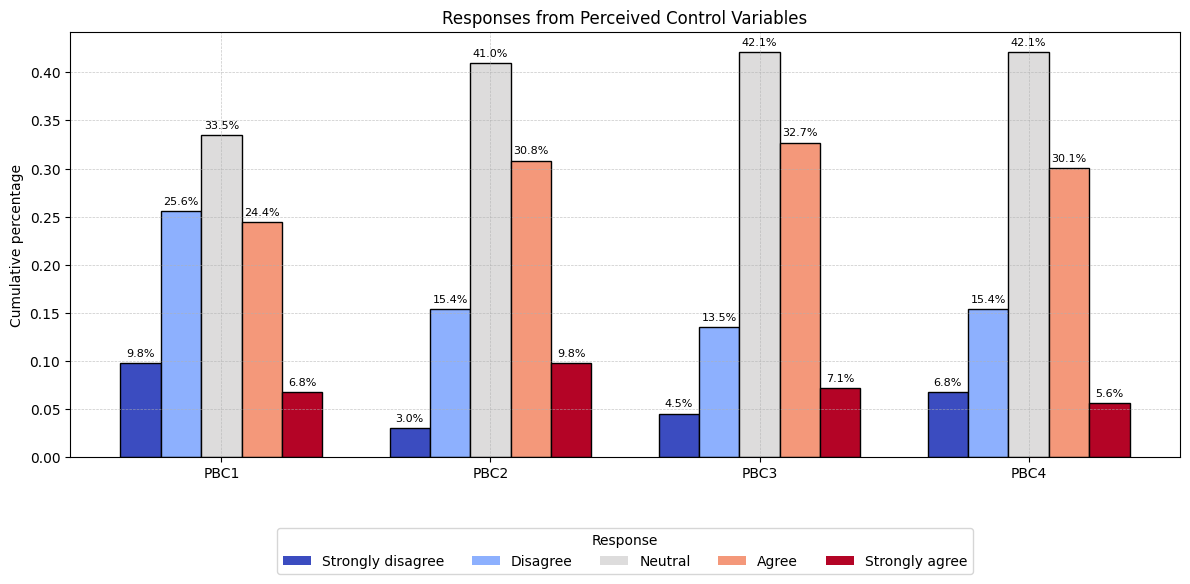

,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
PBC1,0.097744,0.255639,0.334586,0.244361,0.067669
PBC2,0.030075,0.154135,0.409774,0.308271,0.097744
PBC3,0.045113,0.135338,0.421053,0.327068,0.071429
PBC4,0.067669,0.154135,0.421053,0.300752,0.056391


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import coolwarm

# Map numeric values to their corresponding descriptive labels
response_mapping = {
    1: 'Strongly disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly agree'
}

# Replace the numeric values in the PC (Perceived Control) columns with descriptive labels
pc_columns = [
    'PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.',
    'PBC2: I will choose social media as a reference channel for purchasing in the future.',
    'PBC3: I will recommend social media channels to my friends to make purchasing decisions.',
    'PBC4: I will recommend social media channels to my family members to make purchasing decisions.'
]

# Apply mapping to convert numerical values to labels
pc_responses_mapped = df[pc_columns].replace(response_mapping)

# Define the response order
response_labels = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Recalculate the normalized values for each response category
pc_responses_grouped = pc_responses_mapped.apply(pd.Series.value_counts, normalize=True).reindex(response_labels).fillna(0)

# Set up variables for grouped bar chart
x = np.arange(len(pc_columns))  # the label locations
width = 0.15  # the width of the bars
colors = plt.cm.coolwarm(np.linspace(0, 1, len(response_labels)))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, (label, color) in enumerate(zip(response_labels, colors)):
    ax.bar(x + i * width, pc_responses_grouped.loc[label], width, label=label, color=color)

# Add labels, title, and reposition legend
ax.set_ylabel('Cumulative percentage')
ax.set_title('Responses from Perceived Control Variables')
ax.set_xticks(x + 2 * width)
ax.set_xticklabels(['PBC1', 'PBC2', 'PBC3', 'PBC4'])
ax.legend(title='Response', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Annotate bars with percentage values
for i, label in enumerate(response_labels):
    for j, value in enumerate(pc_responses_grouped.loc[label]):
        if value > 0:
            ax.text(x[j] + i * width, value + 0.005, f"{value:.1%}", ha='center', va='bottom', fontsize=8)

# Set edgecolor for all patches (including bars)
for patch in ax.patches:  # Use ax.patches to access all artist objects
    patch.set_edgecolor('black')

# Add gridlines outside the loop (corrected indentation)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

# Apply mapping to convert numerical values to labels
pc_responses_mapped = df[pc_columns].replace(response_mapping)

# Define the response order
response_labels = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Recalculate the normalized values for each response category
pc_responses_grouped = pc_responses_mapped.apply(pd.Series.value_counts, normalize=True).reindex(response_labels).fillna(0)

# Create a DataFrame to display normalized values for each response category
pc_responses_display = pc_responses_grouped.T
pc_responses_display.index = ['PBC1', 'PBC2', 'PBC3', 'PBC4']
pc_responses_display.columns = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Display the DataFrame using display() instead of ace_tools
display(pc_responses_display) # This will display the DataFrame in the output

In [ ]:
# Convert the dictionary to a pandas DataFrame
import pandas as pd

data = pd.DataFrame(df)  # Assuming 'data' is your dictionary

# Verify the column names in your DataFrame
print(data.columns)

# Now, you can access columns using a list of names
# Make sure the column names match the ones in your DataFrame
activity_data = data[['Gender', 'How active are you on social media?',
                      'How frequently do you engage in purchasing various items across different types on social media platforms?']]

# Renaming columns for simplicity
activity_data.columns = ['Gender', 'Activity', 'PurchaseFrequency']

# Aggregating average activity and purchase frequency by Gender
gender_activity = activity_data.groupby('Gender').mean()

# Identifying the gender category with highest activity and purchase frequency
most_active_gender = gender_activity.idxmax()

# Displaying the results
gender_activity, most_active_gender

Index(['Timestamp',
       'Do you consent to participate in this survey? Link to the consent forms available in both English & Bengali.',
       'Gender', 'Age', 'Division in Bangladesh you are based in:',
       'Occupation:', 'Monthly income range:',
       'How active are you on social media?',
       'How frequently do you engage in purchasing various items across different types on social media platforms?',
       'How much of your monthly income you spend on purchases on social media?',
       'On average, how many hours do you spend on the internet per week (out of 168 hours)?',
       'Do the reviews and ratings influence your purchasing decision?',
       'Do the advertisement influence your purchasing decision?',
       'PB1: I am willing to buy a product promoted on social media.',
       'PB2: There is a high probability that I would purchase a product because of the impact of social media.',
       'PB3: I am easily influenced by advertisements on social media to make imp

(                   Activity  PurchaseFrequency
 Gender                                        
 Female             2.305263           1.736842
 Male               2.264706           1.605882
 Prefer Not to Say  1.000000           1.000000,
 Activity             Female
 PurchaseFrequency    Female
 dtype: object)

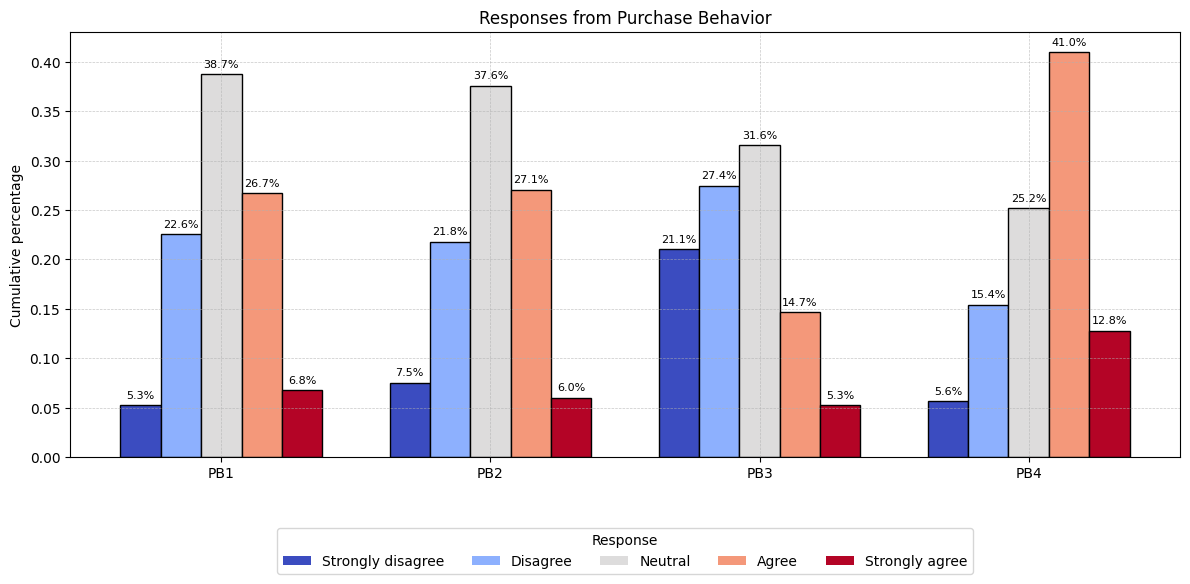

,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
PB1,0.052632,0.225564,0.387218,0.266917,0.067669
PB2,0.075188,0.218045,0.375940,0.270677,0.060150
PB3,0.210526,0.274436,0.315789,0.146617,0.052632
PB4,0.056391,0.154135,0.251880,0.409774,0.127820


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import coolwarm

# Map numeric values to their corresponding descriptive labels
response_mapping = {
    1: 'Strongly disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly agree'
}

# Replace the numeric values in the PC (Perceived Control) columns with descriptive labels
pc_columns = [
    'PB1: I am willing to buy a product promoted on social media.',  # Corrected column name
    'PB2: There is a high probability that I would purchase a product because of the impact of social media.',  # Corrected column name
    'PB3: I am easily influenced by advertisements on social media to make impulsive purchases.',
    'PB4: I had the experience of buying a product due to the influence of social media.'
]
# Apply mapping to convert numerical values to labels
pc_responses_mapped = df[pc_columns].replace(response_mapping)

# Define the response order
response_labels = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Recalculate the normalized values for each response category
pc_responses_grouped = pc_responses_mapped.apply(pd.Series.value_counts, normalize=True).reindex(response_labels).fillna(0)

# Set up variables for grouped bar chart
x = np.arange(len(pc_columns))  # the label locations
width = 0.15  # the width of the bars
colors = plt.cm.coolwarm(np.linspace(0, 1, len(response_labels)))

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

for i, (label, color) in enumerate(zip(response_labels, colors)):
    ax.bar(x + i * width, pc_responses_grouped.loc[label], width, label=label, color=color)

# Add labels, title, and reposition legend
ax.set_ylabel('Cumulative percentage')
ax.set_title('Responses from Purchase Behavior')
ax.set_xticks(x + 2 * width)
ax.set_xticklabels(['PB1', 'PB2', 'PB3', 'PB4'])
ax.legend(title='Response', loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=5)

# Annotate bars with percentage values
for i, label in enumerate(response_labels):
    for j, value in enumerate(pc_responses_grouped.loc[label]):
        if value > 0:
            ax.text(x[j] + i * width, value + 0.005, f"{value:.1%}", ha='center', va='bottom', fontsize=8)

# Set edgecolor for all patches (including bars)
for patch in ax.patches:  # Use ax.patches to access all artist objects
    patch.set_edgecolor('black')

# Add gridlines outside the loop (corrected indentation)
ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

# Apply mapping to convert numerical values to labels
pc_responses_mapped = df[pc_columns].replace(response_mapping)

# Define the response order
response_labels = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Recalculate the normalized values for each response category
pc_responses_grouped = pc_responses_mapped.apply(pd.Series.value_counts, normalize=True).reindex(response_labels).fillna(0)

# Create a DataFrame to display normalized values for each response category
pc_responses_display = pc_responses_grouped.T
pc_responses_display.index = ['PB1', 'PB2', 'PB3', 'PB4']
pc_responses_display.columns = ['Strongly disagree', 'Disagree', 'Neutral', 'Agree', 'Strongly agree']

# Display the DataFrame using display() instead of ace_tools
display(pc_responses_display) # This will display the DataFrame in the output

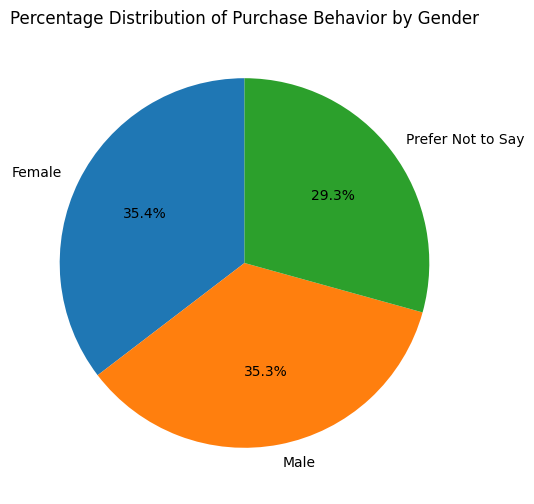

In [ ]:
import matplotlib.pyplot as plt


# Load the Excel file
df = pd.read_excel('/content/Dataset.xlsx')

# Extract relevant columns
gender_column = 'Gender'  # Gender column
pb_columns = [
    'PB1: I am willing to buy a product promoted on social media.',
    'PB2: There is a high probability that I would purchase a product because of the impact of social media.',
    'PB3: I am easily influenced by advertisements on social media to make impulsive purchases.',
    'PB4: I had the experience of buying a product due to the influence of social media.'
]

# Calculate purchase behavior scores by summing PB columns
data['Purchase_Behavior_Score'] = data[pb_columns].mean(axis=1)

# Group by gender and calculate mean purchase behavior score
gender_pb_distribution = data.groupby(gender_column)['Purchase_Behavior_Score'].mean()

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    gender_pb_distribution,
    labels=gender_pb_distribution.index,
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Percentage Distribution of Purchase Behavior by Gender')
plt.show()


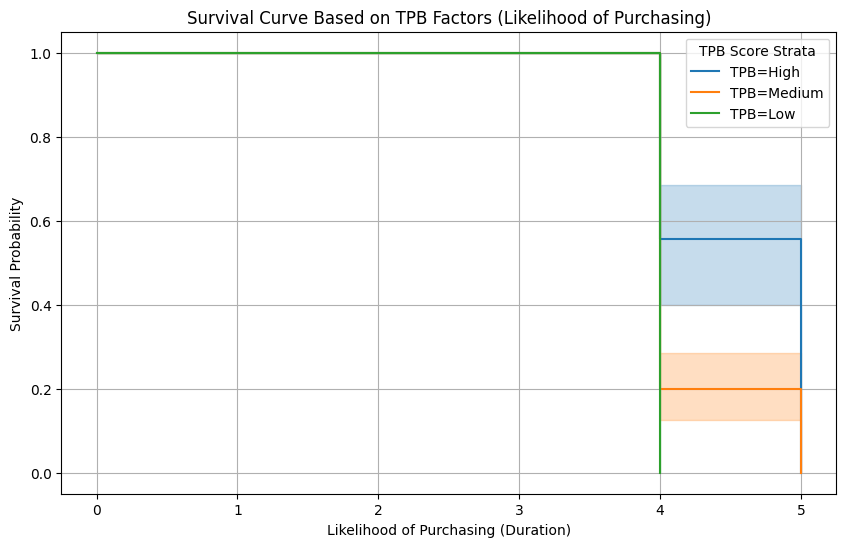

In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Load your dataset
file_path = '/content/Dataset.xlsx'
data = pd.ExcelFile(file_path)
dataset = data.parse('Sheet1')

# Relevant columns for TPB factors
likelihood_column = 'ATTD4:  I have purchased products advertised on social media.'  # Likelihood of purchasing
# Corrected column names to match the actual names in your dataset
attd_columns = [
    "ATTD1: Advertisements on social media can help me to be aware of the existence of a particular product.",
    "ATTD2: Advertisements on social media attract my attention more easily than that of other advertising channels, such as, television, etc.",
    "ATTD3: Prominent keywords, such as, \"promotion\" and \"discount\" on social media attract my attention to seek more information about a product.",
    "ATTD4:  I have purchased products advertised on social media."
]
sn_columns = [
    'SN1: My family has influence over my purchasing habits through social media marketing.',
    'SN2: People around me think that I should purchase products through social media.',
    'SN3: I feel good if many people purchased products through social media.',
    'SN4: My friends encourage me to purchase products through social media.'
]
pbc_columns = [
    'PBC1: Frequent advertisement of a product on social media often motivates me to purchase it.',
    'PBC2: I will choose social media as a reference channel for purchasing in the future.',
    'PBC3: I will recommend social media channels to my friends to make purchasing decisions.',
    'PBC4: I will recommend social media channels to my family members to make purchasing decisions.'
]

# Aggregate TPB factors
dataset['ATTD_Score'] = dataset[attd_columns].mean(axis=1) # Now using the correct column names
dataset['SN_Score'] = dataset[sn_columns].mean(axis=1)
dataset['PBC_Score'] = dataset[pbc_columns].mean(axis=1)

# Binarize the likelihood of purchase (4-5 = "purchase", 1-3 = "no purchase")
dataset['Event'] = dataset[likelihood_column] >= 4
dataset['Duration'] = dataset[likelihood_column]  # Treat likelihood scores as duration

# Create composite TPB scores
dataset['TPB_Score'] = dataset[['ATTD_Score', 'SN_Score', 'PBC_Score']].mean(axis=1)

# Stratify TPB scores into low, medium, and high
dataset['TPB_Strata'] = pd.cut(dataset['TPB_Score'], bins=3, labels=['Low', 'Medium', 'High'])

# Drop missing data
data_filtered = dataset[['Duration', 'Event', 'TPB_Strata']].dropna()

# Kaplan-Meier survival analysis
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))
for group in data_filtered['TPB_Strata'].unique():
    group_data = data_filtered[data_filtered['TPB_Strata'] == group]
    kmf.fit(group_data['Duration'], event_observed=group_data['Event'], label=f'TPB={group}')
    kmf.plot_survival_function()

plt.title("Survival Curve Based on TPB Factors (Likelihood of Purchasing)")
plt.xlabel("Likelihood of Purchasing (Duration)")
plt.ylabel("Survival Probability")
plt.legend(title="TPB Score Strata", loc='best')
plt.grid()
plt.show()